# Telco Customer Churn Classification

**Problem Statement:**

In the telecom industry, customer retention is paramount. With increasing competition and the ease of switching providers, understanding and predicting customer churn is crucial. Churn, the rate at which customers discontinue their services, directly impacts a company's revenue. By analyzing various factors such as demographics, service usage, and contract terms, we can build predictive models to identify customers at risk of churning.

**Aim:**

To classify customers as potential churners based on given numerical and categorical features. This is a binary classification problem for an imbalanced dataset.

**About the Dataset:**

**A fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3.**

**Customer Information:**

* **CustomerID:** A unique ID that identifies each customer.
* **Count:** A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
* **Country:** The country of the customer’s primary residence.
* **State:** The state of the customer’s primary residence.
* **City:** The city of the customer’s primary residence.
* **Zip Code:** The zip code of the customer’s primary residence.
* **Lat Long:** The combined latitude and longitude of the customer’s primary residence.
* **Latitude:** The latitude of the customer’s primary residence.
* **Longitude:** The longitude of the customer’s primary residence.

**Customer Demographics:**

* **Gender:** The customer’s gender: Male, Female
* **Senior Citizen:** Indicates if the customer is 65 or older: Yes, No
* **Partner:** Indicate if the customer has a partner: Yes, No
* **Dependents:** Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

**Customer Services:**

* **Tenure Months:** Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.
* **Phone Service:** Indicates if the customer subscribes to home phone service with the company: Yes, No
* **Multiple Lines:** Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
* **Internet Service:** Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
* **Online Security:** Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
* **Online Backup:** Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
* **Device Protection:** Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
* **Tech Support:** Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
* **Streaming TV:** Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.
* **Streaming Movies:** Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**Customer Account Information:**

* **Contract:** Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
* **Paperless Billing:** Indicates if the customer has chosen paperless billing: Yes, No
* **Payment Method:** Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
* **Monthly Charge:** Indicates the customer’s current total monthly charge for all their services from the company.
* **Total Charges:** Indicates the customer’s total charges, calculated to the end of the quarter specified above.

**Customer Churn Information:**

* **Churn Label:** Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.
* **Churn Value:** 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.
* **Churn Score:** A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.
* **CLTV:** Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.
* **Churn Reason:** A customer’s specific reason for leaving the company. Directly related to Churn Category.

**Notebook Contents:**

1. **Dataset Information**
2. **Exploratory Data Analysis (EDA)**
3. **Summary of EDA**
4. **Feature Engineering**
5. **Modeling**
6. **Conclusion**

**What You Will Learn:**

* Data Visualization
* Data Scaling
* Statistical Tests for Feature Selection
* Modeling and Visualization of Results for Algorithms
* Balancing Imbalanced Datasets
* Stacking of Classifiers

**Let's get started!**


#### Import the Necessary Libraries:

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

#### Downloading the Dataset from Kaggle

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yeanzc/telco-customer-churn-ibm-dataset")

print("Path to dataset files:", path)

100%|██████████████████████████████████████████████████████████████████████████████| 1.25M/1.25M [00:01<00:00, 796kB/s]

Extracting files...


Path to dataset files: C:\Users\91965\.cache\kagglehub\datasets\yeanzc\telco-customer-churn-ibm-dataset\versions\1


In [343]:
data = pd.read_excel(r"C:\Users\91965\churn prediction\Telco_customer_churn.xlsx")
data.head()

CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long  Latitude  Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783     33.96    -118.27    Male  ...  Month-to-month   
1   34.059281, -118.30742     34.06    -118.31  Female  ...  Month-to-month   
2  34.048013, -118.293953     34.05    -118.29  Female  ...  Month-to-month   
3  34.062125, -118.315709     34.06    -118.32  Female  ...  Month-to-month   
4  34.039224, -118.266293     34.04    -118.27    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Total Charges  \
0               Yes               Mailed check            53.85        108.15   
1               Yes           Electronic check            70.70        151.65   
2               Yes           Electronic check            99.65        820.50   
3               Yes           Electronic check           104.80       3046.05   
4               Yes  Bank transfer (automatic)           103.70       5036.30   

  Churn Label Churn Value Churn Score  CLTV                   Churn Reason  
0         Yes           1          86  3239   Competitor made better offer  
1         Yes           1          67  2701                          Moved  
2         Yes           1          86  5372                          Moved  
3         Yes           1          84  5003                          Moved  
4         Yes           1          89  5340  Competitor had better devices  

[5 rows x 33 columns]

#### Data Info:

In [344]:
data.shape

(7043, 33)

In [345]:
data.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [346]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

<Axes: >

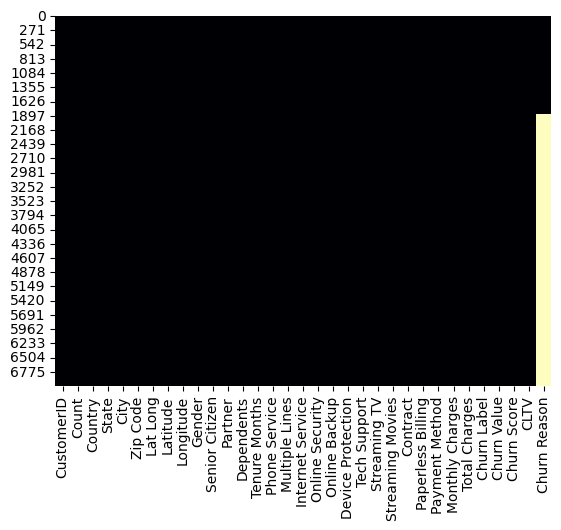

In [347]:
sns.heatmap(data.isnull(), cmap='magma', cbar=False)

#### There are lot's of  null values present in the Churn Reason Column!

In [348]:
data.describe().T

count     mean     std      min      25%      50%      75%  \
Count           7043.00     1.00    0.00     1.00     1.00     1.00     1.00   
Zip Code        7043.00 93521.96 1865.79 90001.00 92102.00 93552.00 95351.00   
Latitude        7043.00    36.28    2.46    32.56    34.03    36.39    38.22   
Longitude       7043.00  -119.80    2.16  -124.30  -121.82  -119.73  -118.04   
Tenure Months   7043.00    32.37   24.56     0.00     9.00    29.00    55.00   
Monthly Charges 7043.00    64.76   30.09    18.25    35.50    70.35    89.85   
Churn Value     7043.00     0.27    0.44     0.00     0.00     0.00     1.00   
Churn Score     7043.00    58.70   21.53     5.00    40.00    61.00    75.00   
CLTV            7043.00  4400.30 1183.06  2003.00  3469.00  4527.00  5380.50   

                     max  
Count               1.00  
Zip Code        96161.00  
Latitude           41.96  
Longitude        -114.19  
Tenure Months      72.00  
Monthly Charges   118.75  
Churn Value         1.00  
Churn Score       100.00  
CLTV             6500.00

- The dataset has too many features with text data and are probably categorical features!
- **Total Charges** is a feature with numerical values but are stored in string datatype. First, we will convert this column into float.

In [349]:
# Converting "Total Charges" datatype from object to float 
data[data['Total Charges'].isin([' '])]['Total Charges']

2234     
2438     
2568     
2667     
2856     
4331     
4687     
5104     
5719     
6772     
6840     
Name: Total Charges, dtype: object

In [350]:
# Replace empty strings with NaN
data['Total Charges'] = data['Total Charges'].replace(' ', np.nan).fillna(method='ffill').astype(float)
data['Total Charges'].dtype

dtype('float64')

In [351]:
data.drop(columns = ['CustomerID', 'Churn Score', 'CLTV', 'Churn Value'], inplace = True)

- While converting the `TotalCharges` column to `float`, an error occurred due to empty strings (`' '`) that could not be converted to a numeric value.
- These empty strings were not recognized as `NaN`, so they were not detected in the missing values heatmap.
- Replaced the empty strings (`' '`) with `NaN`.
- Used the forward fill (`ffill`) method to fill the `NaN` values with the preceding valid values.
- Converted the `TotalCharges` column to `float`.
- Dropped the `customerID`, `Churn Score`, `CLTV`, `Churn Value` column.
- Plan to separate the features into numerical and categorical types and apply label encoding to the categorical features.


In [352]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = data.copy(deep = True)
text_data_features = data.select_dtypes('O').columns.tolist()
features_to_avoid = ['Country', 'State', 'City', 'Lat Long', 'Churn Reason']
text_data_features = [feature for feature in text_data_features if feature not in features_to_avoid]
text_data_features

['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Churn Label']

In [353]:
print('Label Encoder Transformation')
for i in text_data_features :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation
Gender  :  [1 0]  =  ['Male' 'Female']
Senior Citizen  :  [0 1]  =  ['No' 'Yes']
Partner  :  [0 1]  =  ['No' 'Yes']
Dependents  :  [0 1]  =  ['No' 'Yes']
Phone Service  :  [1 0]  =  ['Yes' 'No']
Multiple Lines  :  [0 2 1]  =  ['No' 'Yes' 'No phone service']
Internet Service  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
Online Security  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
Online Backup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
Device Protection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Tech Support  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Streaming TV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Streaming Movies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 2 1]  =  ['Month-to-month' 'Two year' 'One year']
Paperless Billing  :  [1 0]  =  ['Yes' 'No']
Payment Method  :  [3 2 0 1]  =  ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn Label  :  [1 0]

We create a deep copy of the original dataset to preserve the original data integrity. This ensures that modifications made to the copy won't affect the original dataset.

Next, we perform label encoding on text-based features to convert them into numerical representations suitable for machine learning models. However, we've excluded certain features like `['Country', 'State', 'City', 'Lat Long', 'Churn Reason']` as label encoding wouldn't be meaningful for these specific attributes.

After applying label encoding, we'll re-examine the descriptive statistics of the dataset to gain insights into the transformed numerical data.

In [354]:
cols_to_observe = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label']
df1[cols_to_observe].describe()

Gender  Senior Citizen  Partner  Dependents  Tenure Months  \
count 7043.00         7043.00  7043.00     7043.00        7043.00   
mean     0.50            0.16     0.48        0.23          32.37   
std      0.50            0.37     0.50        0.42          24.56   
min      0.00            0.00     0.00        0.00           0.00   
25%      0.00            0.00     0.00        0.00           9.00   
50%      1.00            0.00     0.00        0.00          29.00   
75%      1.00            0.00     1.00        0.00          55.00   
max      1.00            1.00     1.00        1.00          72.00   

       Phone Service  Multiple Lines  Internet Service  Online Security  \
count        7043.00         7043.00           7043.00          7043.00   
mean            0.90            0.94              0.87             0.79   
std             0.30            0.95              0.74             0.86   
min             0.00            0.00              0.00             0.00   
25%             1.00            0.00              0.00             0.00   
50%             1.00            1.00              1.00             1.00   
75%             1.00            2.00              1.00             2.00   
max             1.00            2.00              2.00             2.00   

       Online Backup  Device Protection  Tech Support  Streaming TV  \
count        7043.00            7043.00       7043.00       7043.00   
mean            0.91               0.90          0.80          0.99   
std             0.88               0.88          0.86          0.89   
min             0.00               0.00          0.00          0.00   
25%             0.00               0.00          0.00          0.00   
50%             1.00               1.00          1.00          1.00   
75%             2.00               2.00          2.00          2.00   
max             2.00               2.00          2.00          2.00   

       Streaming Movies  Contract  Paperless Billing  Payment Method  \
count           7043.00   7043.00            7043.00         7043.00   
mean               0.99      0.69               0.59            1.57   
std                0.89      0.83               0.49            1.07   
min                0.00      0.00               0.00            0.00   
25%                0.00      0.00               0.00            1.00   
50%                1.00      0.00               1.00            2.00   
75%                2.00      1.00               1.00            2.00   
max                2.00      2.00               1.00            3.00   

       Monthly Charges  Total Charges  Churn Label  
count          7043.00        7043.00      7043.00  
mean             64.76        2283.68         0.27  
std              30.09        2266.74         0.44  
min              18.25          18.80         0.00  
25%              35.50         401.68         0.00  
50%              70.35        1397.30         0.00  
75%              89.85        3798.38         1.00  
max             118.75        8684.80         1.00

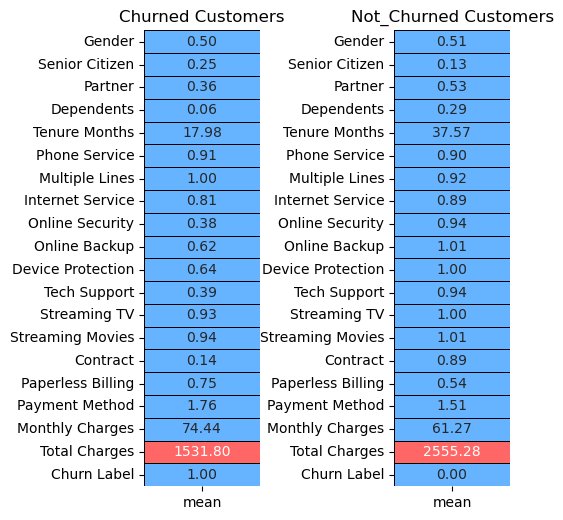

In [355]:
colors = ['#66b3ff', '#ff6666']

churn = df1[df1['Churn Label'] == 1].describe().T.loc[cols_to_observe, :]
not_churn = df1[df1['Churn Label'] == 0].describe().T.loc[cols_to_observe, :]

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Churned Customers');

plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Not_Churned Customers');

fig.tight_layout(pad = 0)

**Mean Values of Features for Churned and Not-Churned Customers**

| Feature | Mean (Churned) | Mean (Not-Churned) |
|---|---|---|
| Tenure Months | 17.98 | 37.57 |
| Online Security | 0.29 | 0.30 |
| Online Backup | 0.24 | 0.38 |
| Device Protection | 0.22 | 0.34 |
| Tech Support | 0.20 | 0.29 |
| Contract | 0.45 | 0.90 |
| Monthly Charges | 74.44 | 61.27 |
| Total Charges | 1531.80 | 2557.31 |

**Observations:**

* **Tenure:** Customers who churned had a significantly lower average tenure (17.98 months) compared to those who stayed (37.57 months).
* **Additional Services:** Customers who churned were less likely to subscribe to additional services like Online Security, Online Backup, Device Protection, and Tech Support.
* **Contract:** Churned customers were more likely to be on month-to-month contracts, indicating a lower commitment to the service provider.
* **Monthly Charges:** Interestingly, churned customers had a slightly higher average monthly charge.
* **Total Charges:** Not-churned customers had a significantly higher total charge, likely due to longer tenure and additional services.

**Note:** The dataset's numerous categorical features contribute to the relatively low mean values for many features. 

In the next section, we'll delve deeper into the data through exploratory data analysis (EDA) to gain further insights.

## Exploratory Data Analysis

Dividing features into Numerical and Categorical :

In [356]:
col = list(df1.loc[:, cols_to_observe].columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Gender Senior Citizen Partner Dependents Phone Service Multiple Lines Internet Service Online Security Online Backup Device Protection Tech Support Streaming TV Streaming Movies Contract Paperless Billing Payment Method Churn Label
Numerical Features : Tenure Months Monthly Charges Total Charges


#### Target Variable Visualization (Churn Label) :

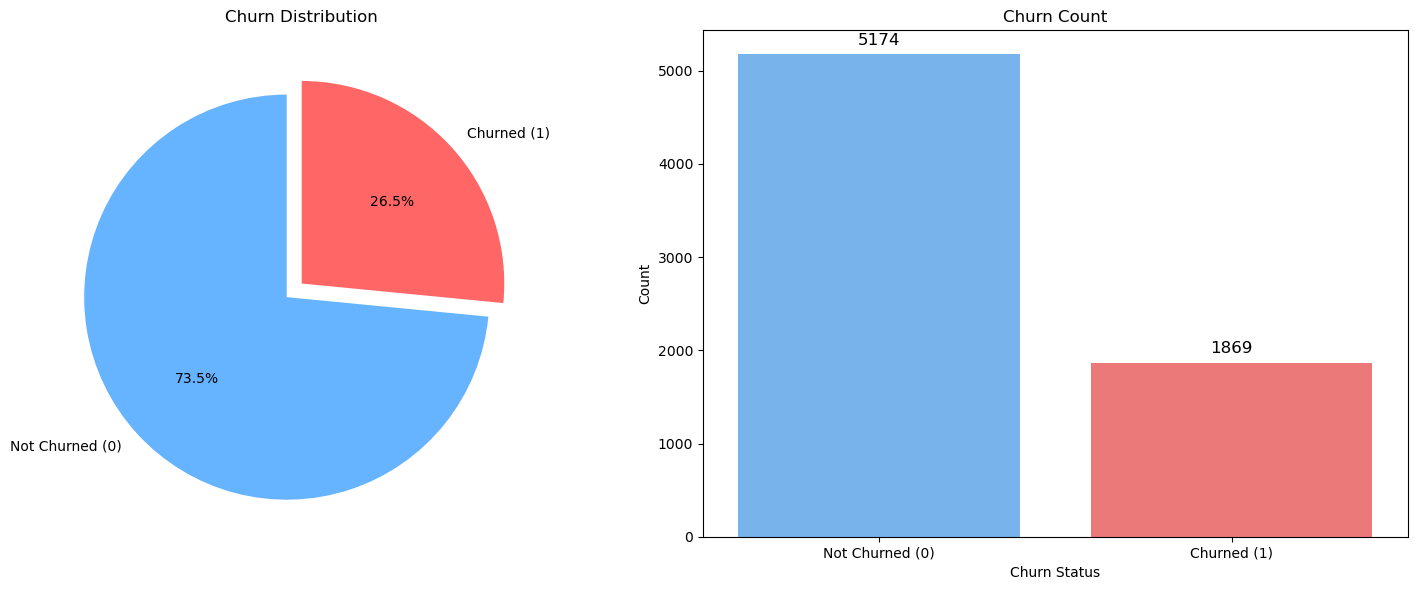

In [357]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Pie chart (left side)
churn_counts = data['Churn Label'].value_counts()
churn_labels = ['Not Churned (0)', 'Churned (1)']
churn_colors = ['#66b3ff', '#ff6666']

axes[0].pie(churn_counts, labels=churn_labels, autopct='%1.1f%%', startangle=90, colors=churn_colors, explode=(0.1, 0))
axes[0].set_title('Churn Distribution')

# Plot 2: Count plot (right side)
sns.countplot(x='Churn Label', data=data, ax=axes[1], palette=churn_colors, order=['No', 'Yes'])
axes[1].set_title('Churn Count')
axes[1].set_xticklabels(['Not Churned (0)', 'Churned (1)'], rotation=0)
axes[1].set_xlabel('Churn Status')
axes[1].set_ylabel('Count')

# Annotate the bars with counts
for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     fontsize=12, color='black', 
                     xytext=(0, 10), textcoords='offset points')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


**Data Imbalance**

The dataset exhibits a significant class imbalance, with approximately 3 times as many "Not-Churn" customers as "Churn" customers. This imbalance can lead to biased models that tend to predict the majority class (Not-Churn) more accurately. 

This imbalance will also be evident in visualizations, where the distribution of the two classes will be skewed.

#### Categorical Features vs Target Variable (Churn):

In [358]:
categorical_features.remove('Churn Label')

- We will remove Churn, target variable, from the categorical features list for visualization purposes.

In [359]:
l1 = ['Gender','Senior Citizen','Partner','Dependents'] # Customer Information
l2 = ['Phone Service','Multiple Lines','Internet Service','Streaming TV','Streaming Movies',
      'Online Security','Online Backup','Device Protection','Tech Support'] # Services Signed Up for!
l3 = ['Contract','Paperless Billing','Payment Method'] # Payment Information

- We have too many categorical features in this dataset!
- We divide them into 3 groups depending on their values or based on the column name!

Group 1 : **Customer Information** :

`gender` | `Senior Citizen` | `Partner` | `Dependents` |

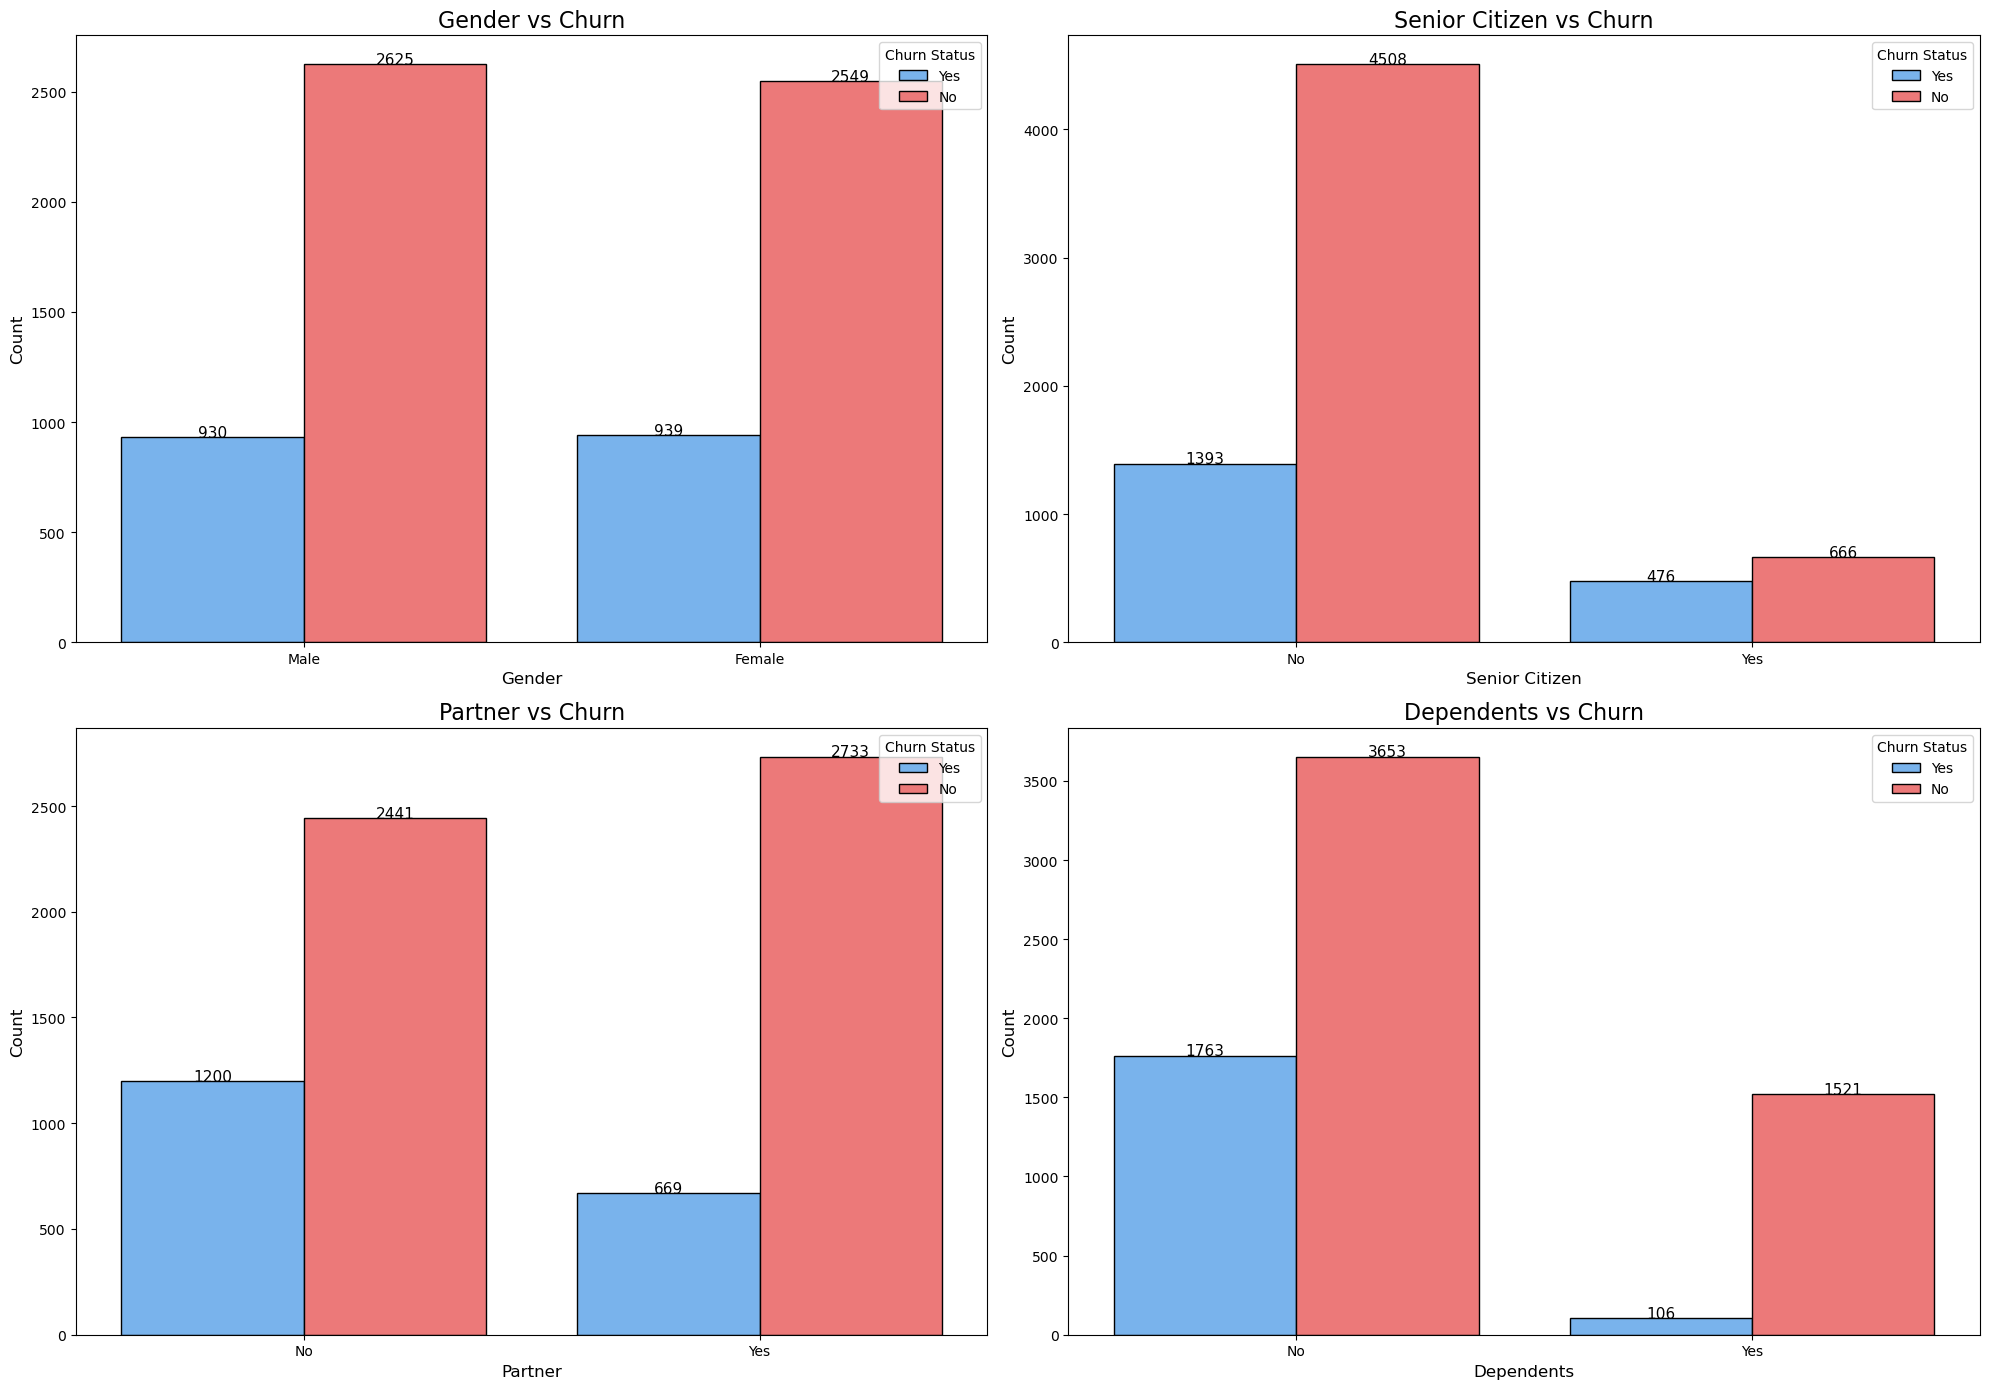

In [360]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 14))

for i, feature in enumerate(l1):
    ax = axes[i//2, i%2]  # Accessing the subplot position
    
    # Create the countplot with hue based on 'Churn Label'
    sns.countplot(x=feature, data=data, hue='Churn Label', palette=churn_colors, ax=ax, edgecolor='black')

    # Annotating each bar with the height value (count)
    for rect in ax.patches:
        ax.text(
            rect.get_x() + rect.get_width() / 2,  # x position
            rect.get_height() + 2,                # y position
            int(rect.get_height()),               # Value of the count
            horizontalalignment='center',         # Center the text
            fontsize=11,                           # Font size
            color='black'                          # Text color
        )
    
    # Set title and labels
    ax.set_title(f'{feature} vs Churn', fontsize=16)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.legend(title='Churn Status', loc='upper right')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


**Customer Churn Analysis by Demographic Factors**

* **Gender:** The churn rate for both male and female customers appears to be quite similar, indicating that gender is not a significant factor in predicting churn. 
* **Senior Citizen:** While the number of senior citizens in the dataset is relatively low, a notable 40% of them have churned. This suggests that senior citizens may be more prone to churn.
* **Partner and Dependents:** Customers with partners and dependents tend to have lower churn rates. This may be due to factors such as family commitments and longer-term contracts.

Group 2: **Services Subscribed by the Customer :**
        
For visualization purposes, we will create 2 groups

`Phone Service` | `Multiple Lines` | `Internet Service` | `Streaming TV` | `Streaming Movies` |

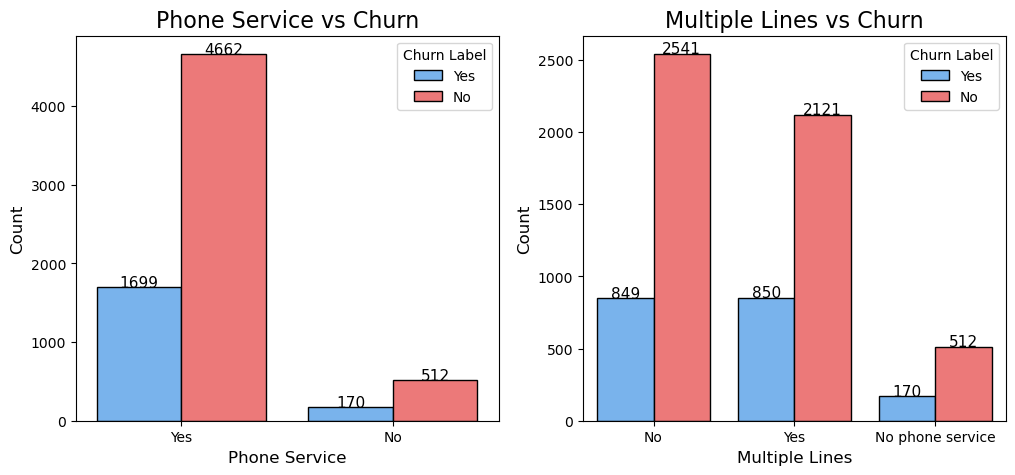

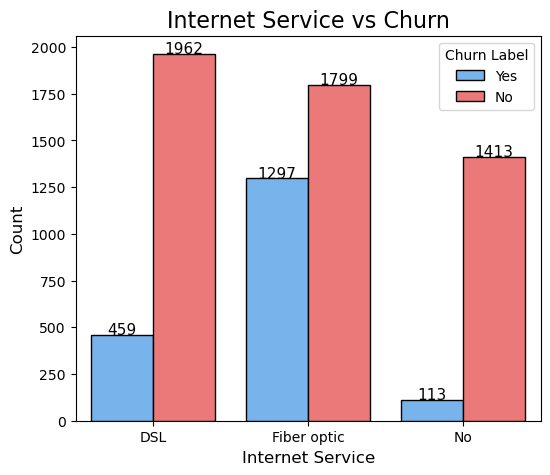

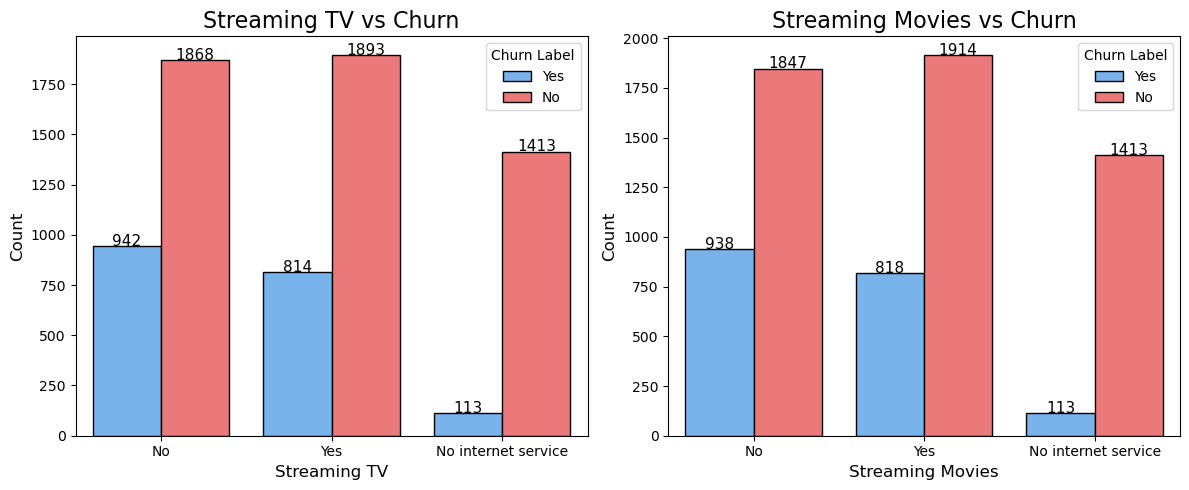

In [361]:

# Colors palette for 'Churn' status
colors = ['#66b3ff', '#ff6666']

# Function to plot countplot and add annotations for each bar
def plot_countplot(ax, feature):
    sns.countplot(x=feature, data=data, hue="Churn Label", palette=colors, edgecolor='black', ax=ax)
    
    # Annotate each bar with the count value
    for rect in ax.patches:
        ax.text(
            rect.get_x() + rect.get_width() / 2,  # Positioning the text at the center of the bar
            rect.get_height() + 2,                # Adding a small gap above the bar
            int(rect.get_height()),               # Count value
            horizontalalignment='center',         # Center the text
            fontsize=11,                           # Font size
            color='black'                          # Text color
        )
    
    # Set title and axis labels
    ax.set_title(f'{feature} vs Churn', fontsize=16)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

# Plot 1: First 2 features (Side-by-side)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
for i, feature in enumerate(l2[:2]):
    plot_countplot(axes[i], feature)

# Plot 2: Third feature
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 5))
plot_countplot(ax, l2[2])

# Plot 3: Last 2 features (Side-by-side)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
for i, feature in enumerate(l2[3:5]):
    plot_countplot(axes[i], feature)

# Adjust layout to avoid overlapping and ensure proper spacing
plt.tight_layout()
plt.show()


**Customer Churn Analysis by Service Usage**

* **Phone Service:** Surprisingly, a higher number of customers retained their service even when they didn't have a phone service. This could be due to various factors, such as bundled plans or other value-added services.
* **Multiple Lines:** The churn rate was similar for customers with and without multiple lines, suggesting that this factor may not be a strong predictor of churn.
* **Internet Service:** While many customers preferred DSL, a significant number of customers opted out of fiber optic internet service. This could be due to factors such as cost, availability, or perceived quality.
* **Streaming Services:** Both Streaming TV and Streaming Movies showed similar patterns. A large number of customers churned regardless of their subscription status to these services, indicating that streaming content alone may not be a major driver of churn.

Group 2: **Services Subscribed by the Customer :**
        
`Online Security` | `Online Backup` | `Device Protection` | `Tech Support` |

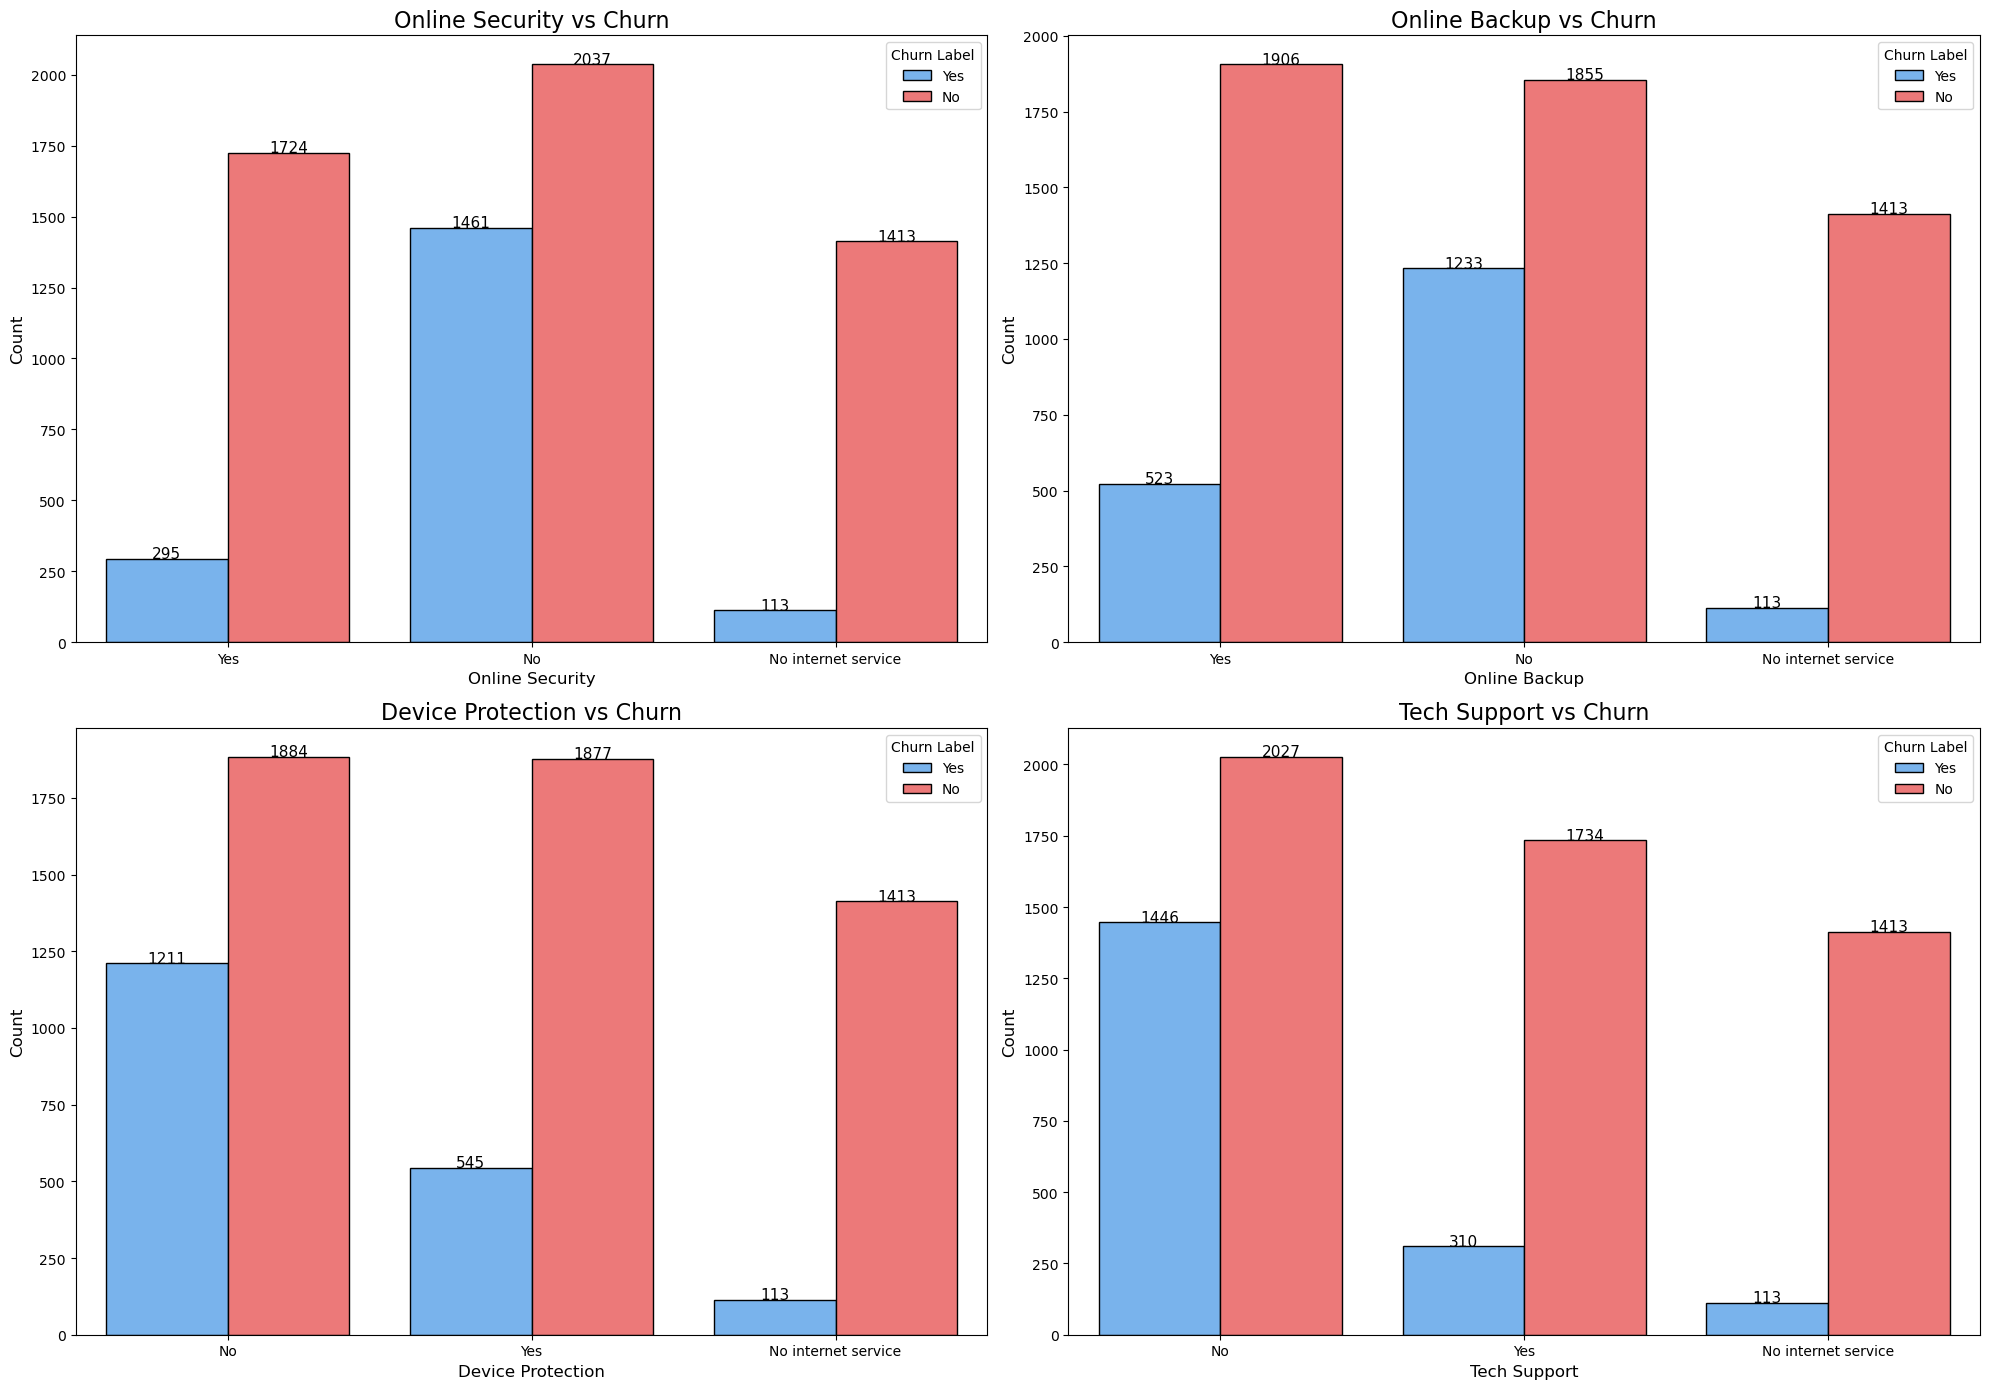

In [362]:

colors = ['#66b3ff', '#ff6666']

# Function to plot countplot and add annotations
def plot_churn_countplot(ax, feature):
    sns.countplot(x=feature, data=data, hue="Churn Label", palette=colors, edgecolor='black', ax=ax)
    
    # Annotate each bar with the count value
    for rect in ax.patches:
        ax.text(
            rect.get_x() + rect.get_width() / 2,  # Position the text in the middle of the bar
            rect.get_height() + 2,                # Small gap above the bar
            int(rect.get_height()),               # Display the count value
            horizontalalignment='center',         # Align the text
            fontsize=11,                           # Set font size
            color='black'                          # Set text color
        )
    
    # Set title for each subplot
    ax.set_title(f'{feature} vs Churn', fontsize=16)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

# Plotting the last 4 features in a 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 14))

for i, feature in enumerate(l2[-4:]):
    plot_churn_countplot(axes[i // 2, i % 2], feature)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


**The Importance of Additional Services**

The provided visualizations highlight the significance of additional services like Online Security, Online Backup, Device Protection, and Tech Support in customer retention. A substantial number of customers opted to switch providers when these services were not up to par. 

This underscores the importance of investing in these services and ensuring high-quality support to retain customers.

Group 3 : `Contract` | `Paperless Billing` | `Payment Method` |

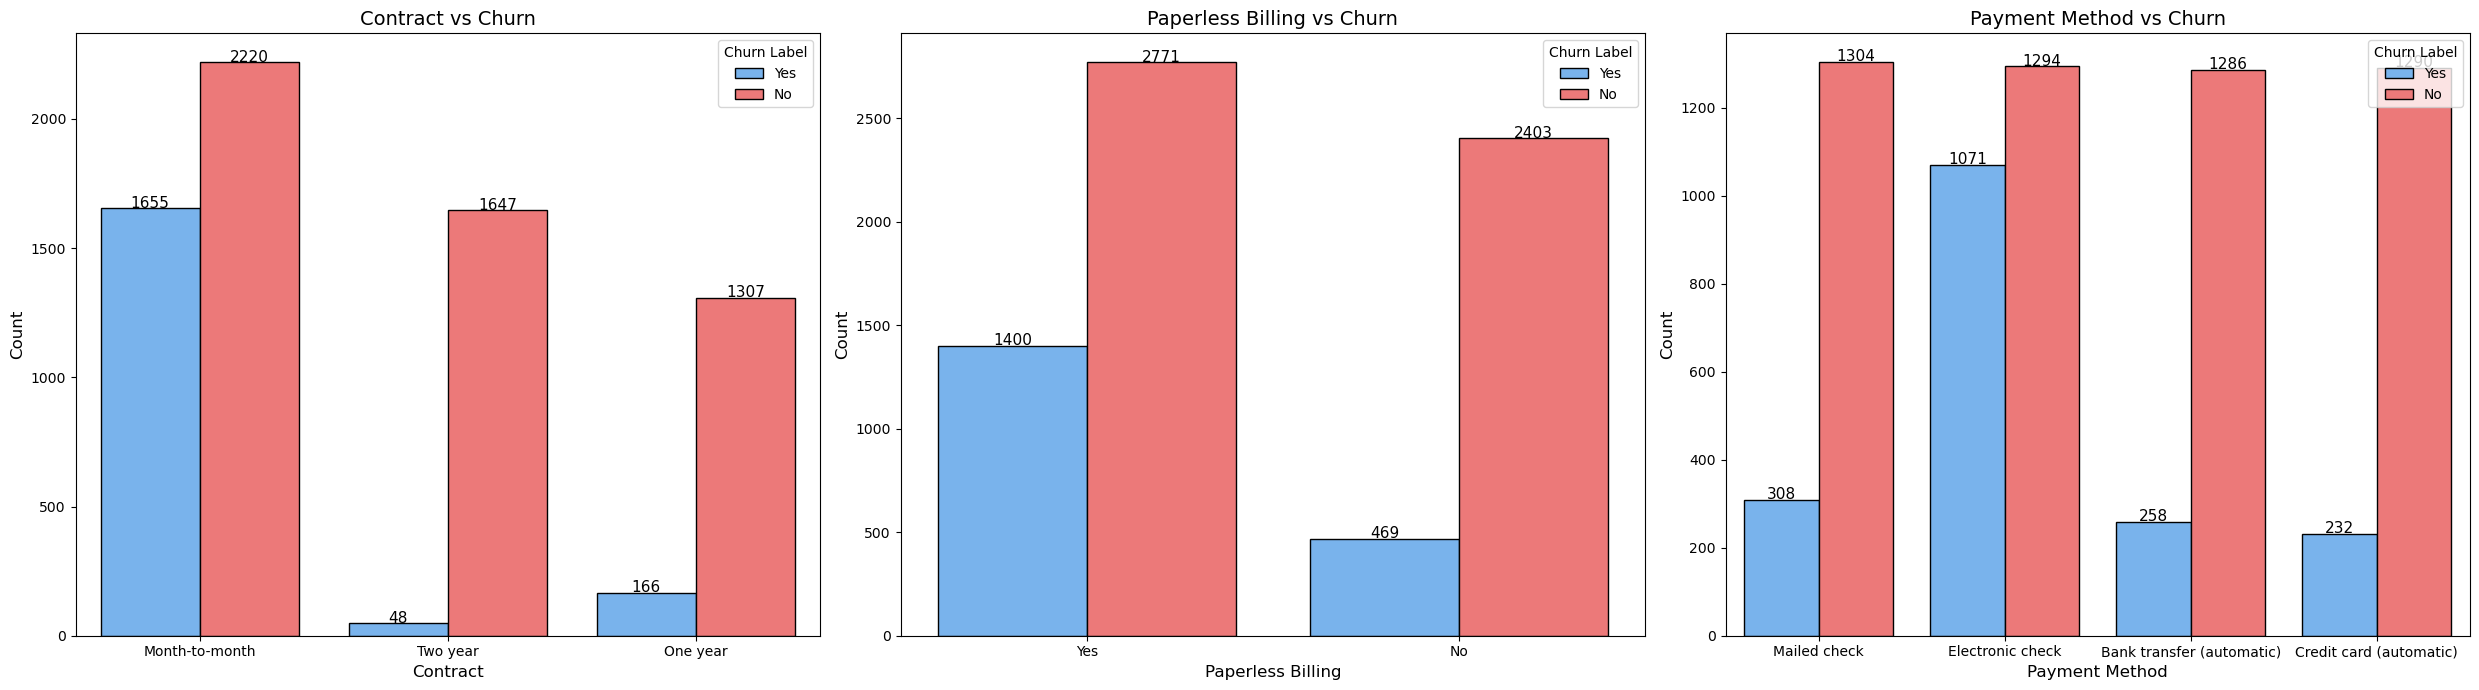

In [363]:
churn_colors = ['#66b3ff', '#ff6666']

# Function to create a count plot with annotations
def plot_count(feature, ax):
    ax = sns.countplot(x=feature, data=data, hue="Churn Label", palette=churn_colors, edgecolor='black', ax=ax)
    for rect in ax.patches:
        ax.text(
            rect.get_x() + rect.get_width() / 2, 
            rect.get_height() + 2, 
            int(rect.get_height()), 
            ha='center', fontsize=11
        )
    ax.set_title(f'{feature} vs Churn', fontsize=14)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

# Plotting the features in a single row layout
fig, axes = plt.subplots(1, 3, figsize=(25, 7))
features = l3[:3]

for i, feature in enumerate(features):
    plot_count(feature, axes[i])

plt.tight_layout()
plt.show()


**Customer Churn Analysis by Contract, Billing, and Payment**

* **Contract:** Month-to-month contracts exhibited the highest churn rate. This is likely due to the flexibility of these contracts, allowing customers to easily switch providers.
* **Paperless Billing:** A significant number of customers who opted for paperless billing churned. This could be attributed to various factors, such as billing disputes, payment issues, or dissatisfaction with communication channels.
* **Payment Method:** Electronic checks were the most common payment method among churned customers. This suggests that there may be issues with this payment method, such as processing delays or security concerns.

#### Categorical Features vs Positive Target Variable (Churn Cases) :
 - We will now point our attention directly towards to the churn customers!

Group 1 : **Customer Information** :
`gender` | `SeniorCitizen`| `Partner` | `Dependents` |

In [364]:
gender = df1[df1['Churn Label'] == 1]['Gender'].value_counts(normalize=True) * 100

seniorcitizen = df1[df1['Churn Label'] == 1]['Senior Citizen'].value_counts(normalize=True) * 100

partner = df1[df1['Churn Label'] == 1]['Partner'].value_counts(normalize=True) * 100

dependents = df1[df1['Churn Label'] == 1]['Dependents'].value_counts(normalize=True) * 100

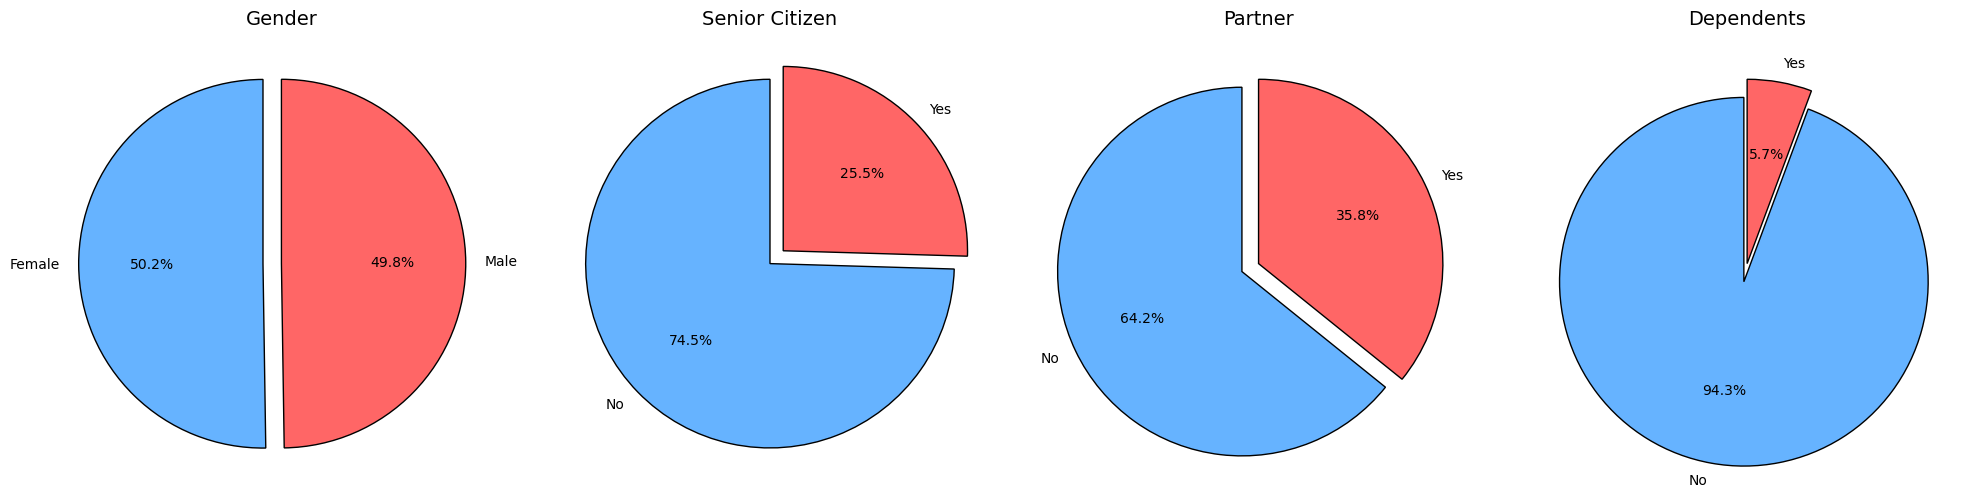

In [365]:
# Data and labels for the pies
features = [gender, seniorcitizen, partner, dependents]
labels_list = [['Female', 'Male'], ['No', 'Yes'], ['No', 'Yes'], ['No', 'Yes']]
titles = ['Gender', 'Senior Citizen', 'Partner', 'Dependents']
explode_values = [(0.1, 0), (0, 0.1), (0.1, 0), (0.1, 0)]
colors = ['#66b3ff', '#ff6666']

# Create the subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

for i, ax in enumerate(axes):
    ax.pie(
        features[i], 
        labels=labels_list[i], 
        autopct='%1.1f%%', 
        startangle=90, 
        explode=explode_values[i], 
        colors=colors, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True}
    )
    ax.set_title(titles[i], fontsize=14)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


**Key Insights from Churn Analysis**

* **Gender:** The churn rate is evenly distributed between male and female customers, suggesting that gender is not a significant factor influencing churn.
* **Age:** A majority of churned customers are not senior citizens, indicating that younger demographics are more likely to switch providers.
* **Household Composition:** Customers living alone are more likely to churn compared to those with partners or dependents. This could be due to various factors, such as lifestyle changes, financial constraints, or dissatisfaction with services.

Group 2: **Services Subscribed by the Customer** :
`Phone Service` | `Multiple Lines` | `Internet Service` | `Streaming TV` | `Streaming Movies` |

In [366]:
phoneservice = df1[df1['Churn Label'] == 1]['Phone Service'].value_counts(normalize=True) * 100

multiplelines = df1[df1['Churn Label'] == 1]['Multiple Lines'].value_counts(normalize=True) * 100

internetservice = df1[df1['Churn Label'] == 1]['Internet Service'].value_counts(normalize=True) * 100

streamingtv = df1[df1['Churn Label'] == 1]['Streaming TV'].value_counts(normalize=True) * 100

streamingmovies = df1[df1['Churn Label'] == 1]['Streaming Movies'].value_counts(normalize=True) * 100
 

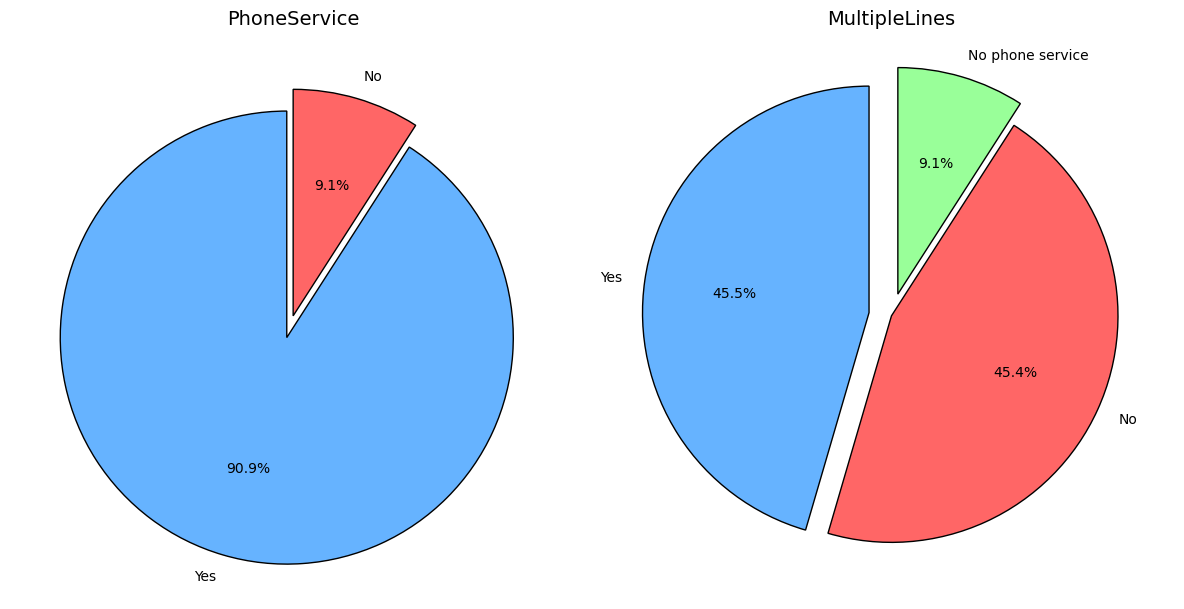

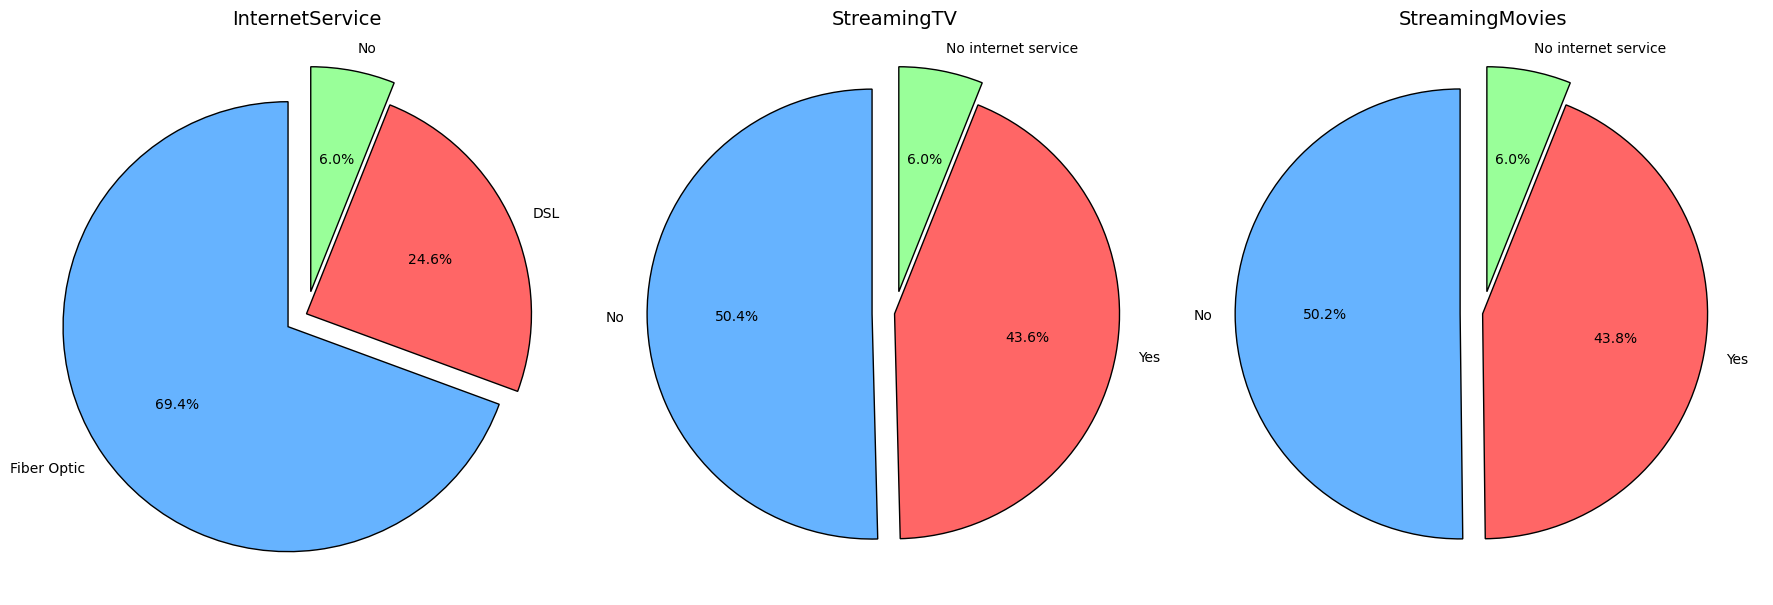

In [367]:
# Data and corresponding labels
info = [
    (phoneservice, ['Yes', 'No'], 'PhoneService', (0.1, 0)),
    (multiplelines, ['Yes', 'No' ,'No phone service'], 'MultipleLines', (0.1, 0, 0.1)),
    (internetservice, ['Fiber Optic', 'DSL', 'No'], 'InternetService', (0.1, 0, 0.1)),
    (streamingtv, ['No', 'Yes', 'No internet service'], 'StreamingTV', (0.1, 0, 0.1)),
    (streamingmovies, ['No', 'Yes', 'No internet service'] , 'StreamingMovies', (0.1, 0, 0.1)),
]

    
colors = ['#66b3ff', '#ff6666', '#99ff99'] 

# Subplot configurations
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for i, (values, labels, title, explode) in enumerate(info[:2]):
    ax = axes[i]
    ax.pie(
        values,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        explode=explode,
        colors=colors[:len(labels)],
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True},
    )
    ax.set_title(title, fontsize=14)

# Adjust layout for spacing
plt.tight_layout()
plt.show()

# Second set of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, (values, labels, title, explode) in enumerate(info[2:]):
    ax = axes[i]
    ax.pie(
        values,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        explode=explode,
        colors=colors[:len(labels)],
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True},
    )
    ax.set_title(title, fontsize=14)

# Adjust layout for spacing
plt.tight_layout()
plt.show()


**Service Usage and Churn**

* **Phone Service:** A significant number of customers churned even when they had phone service. This suggests that other factors, such as internet service quality or customer support, may have played a more significant role in the decision to switch.
* **Multiple Lines:** The availability of multiple lines did not seem to impact churn rates.
* **Internet Service:** A large number of customers opted out of fiber optic internet service, indicating potential issues with service quality, pricing, or availability.
* **Streaming Services:** While customers without streaming services were more likely to churn, a substantial portion of customers who subscribed to streaming services also switched. This suggests that streaming services alone may not be enough to retain customers.

Group 2: **Services Subscribed by the Customer :**
`Online Security`| `Online Backup` | `Device Protection` | `Tech Support` |

In [368]:
onlinesecurity = df1[df1['Churn Label'] == 1]['Online Security'].value_counts(normalize=True) * 100

onlinebackup = df1[df1['Churn Label'] == 1]['Online Backup'].value_counts(normalize=True) * 100

deviceprotection = df1[df1['Churn Label'] == 1]['Device Protection'].value_counts(normalize=True) * 100

techsupport = df1[df1['Churn Label'] == 1]['Tech Support'].value_counts(normalize=True) * 100

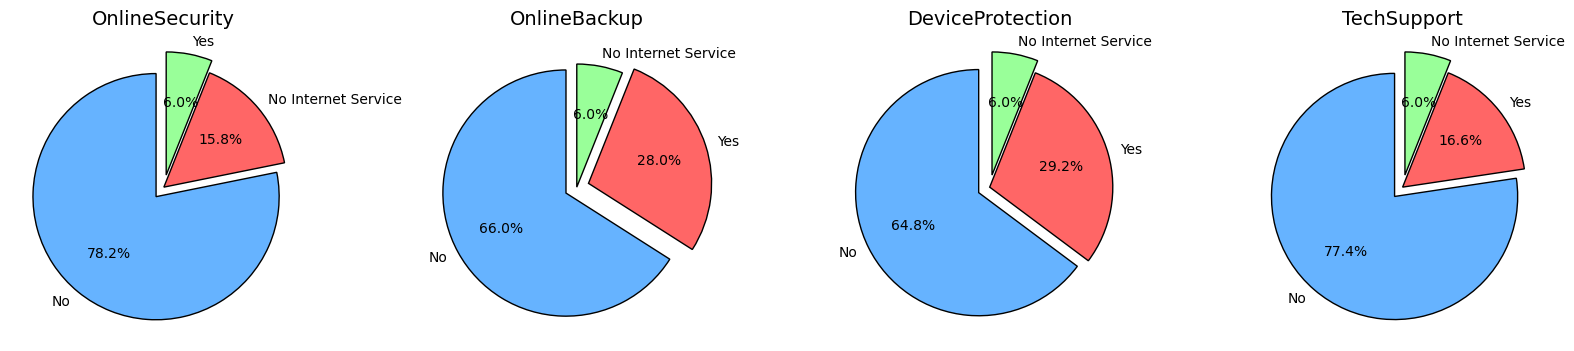

In [369]:
# Data for the pie charts
services = [
    (onlinesecurity, ['No', 'No Internet Service', 'Yes'], 'OnlineSecurity', (0.1, 0, 0.1)),
    (onlinebackup, ['No', 'Yes', 'No Internet Service'], 'OnlineBackup', (0.1, 0.1, 0)),
    (deviceprotection, ['No', 'Yes', 'No Internet Service'], 'DeviceProtection', (0.1, 0, 0.1)),
    (techsupport, ['No', 'Yes', 'No Internet Service'], 'TechSupport', (0.1, 0, 0.1)),
]

colors = ['#66b3ff', '#ff6666', '#99ff99']  

# Create the subplots
fig, axes = plt.subplots(1, 4, figsize=(16, 6))

# Loop through the services and create each pie chart
for ax, (values, labels, title, explode) in zip(axes, services):
    ax.pie(
        values,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        explode=explode,
        colors=colors[:len(labels)],
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True},
    )
    ax.set_title(title, fontsize=14)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


 - Above pie charts stress out the significance of providing **Online Security**, **Online Backup**, **Device Protection** & **Tech Support** as an average of 71.6% customers cutoff their services due to lack of these features!

Group 3 : `Contract` | `PaperlessBilling` | `PaymentMethod` |

In [370]:
contract = df1[df1['Churn Label'] == 1]['Contract'].value_counts(normalize=True) * 100

paperlessbilling = df1[df1['Churn Label'] == 1]['Paperless Billing'].value_counts(normalize=True) * 100 

paymentmethod = df1[df1['Churn Label'] == 1]['Payment Method'].value_counts(normalize=True) * 100


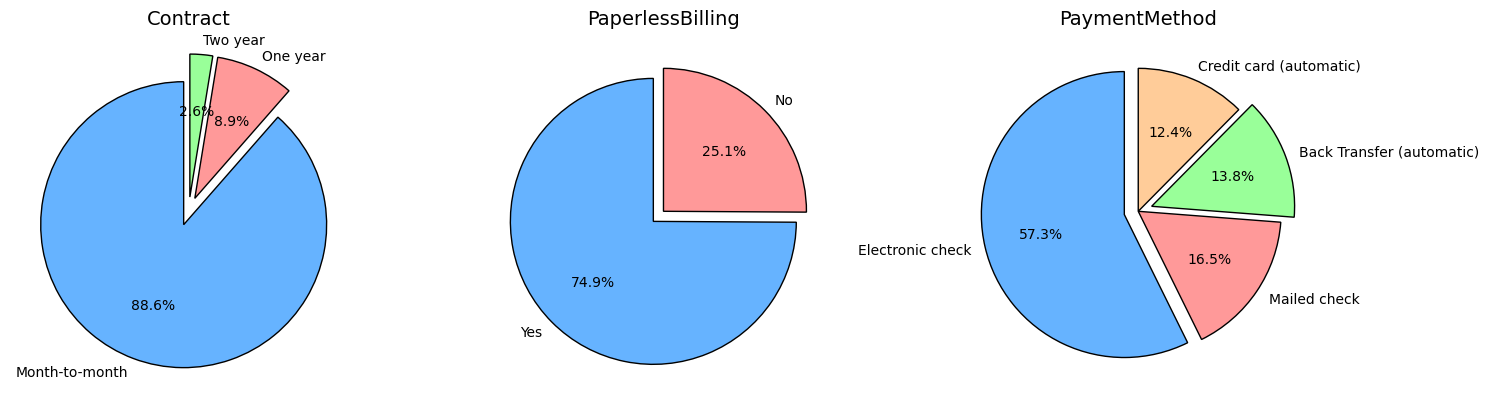

In [371]:
import matplotlib.pyplot as plt

# Data for the pie charts
categories = [
    (contract, ['Month-to-month', 'One year', 'Two year'], 'Contract', (0.1, 0.1, 0.1)),
    (paperlessbilling, ['Yes', 'No'], 'PaperlessBilling', (0.1, 0)),
    (paymentmethod, ['Electronic check', 'Mailed check', 'Back Transfer (automatic)' ,'Credit card (automatic)'
 ], 
     'PaymentMethod', (0.1, 0, 0.1, 0)),
]

colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99']  # Example color scheme

# Create the subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 7))

# Loop through categories to create the pie charts
for ax, (values, labels, title, explode) in zip(axes, categories):
    ax.pie(
        values,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        explode=explode,
        colors=colors[:len(labels)],
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True},
    )
    ax.set_title(title, fontsize=14)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


**Contract, Billing, and Payment Insights**

* **Contract:** Month-to-month contracts were the primary driver of churn, accounting for a significant portion of customer departures.
* **Paperless Billing:** While paperless billing is often touted as a convenient option, it didn't seem to have a positive impact on customer retention.
* **Payment Method:** Electronic checks were the most common payment method among churned customers, suggesting potential issues with this payment method.

**Numerical Features :**
Distribution of Numerical Features :

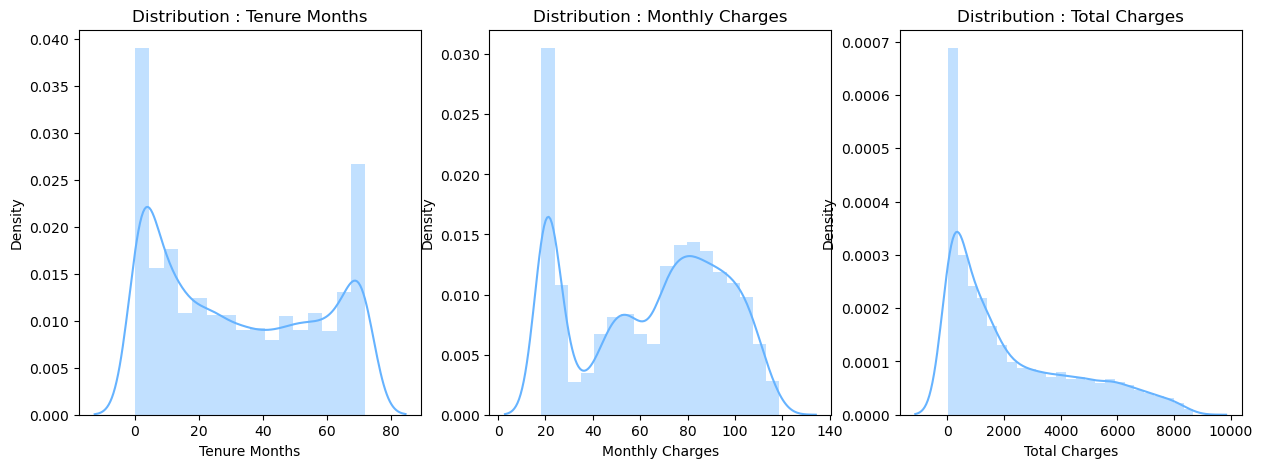

In [372]:
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(len(numerical_features)):
    plt.subplot(1,3,i+1)
    sns.distplot(df1[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

 - tenure and MonthlyCharges kind of create a bimodal distribution with peaks present at 0 - 70 and 20 - 80 respectively.
 - TotalCharges displays a positively or rightly skewed distribution.

#### Numerical Features w.r.t Target Variable (Outcome) :

KeyboardInterrupt: 

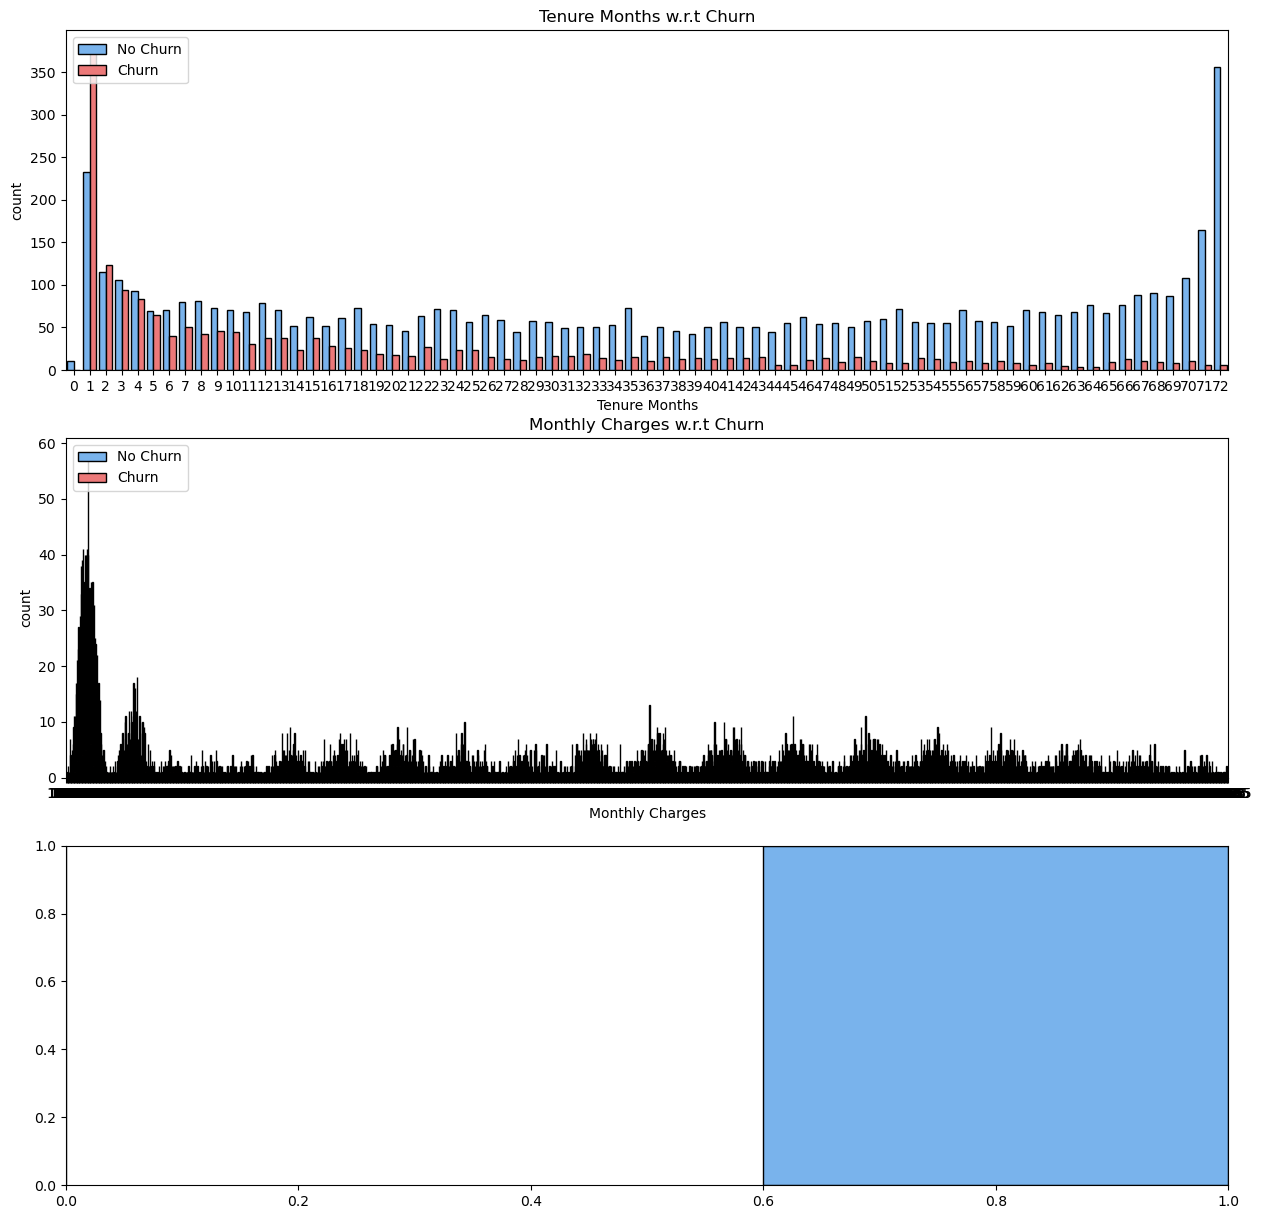

In [373]:

colors = ['#66b3ff', '#ff6666']
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

# Loop through numerical features and create count plots
for i, feature in enumerate(numerical_features):
    sns.countplot(
        x=feature, data=df1, hue="Churn Label",
        palette=colors, edgecolor='black', ax=ax[i]
    )
    ax[i].legend(['No Churn', 'Churn'], loc='upper left')
    ax[i].set_title(f"{feature} w.r.t Churn")


plt.tight_layout()
plt.show()


**Tenure, Monthly Charges, and Total Charges**

* **Tenure:** A significant number of customers churned within the first few months of their subscription. However, as the tenure increased, the churn rate decreased. This suggests that customer satisfaction and loyalty tend to increase with longer tenure.
* **Monthly Charges and Total Charges:** Due to the wide range of values in these features, direct visualization may not provide meaningful insights. To address this, we'll apply scaling techniques to normalize the data and facilitate better visualization. This will help us identify potential trends and correlations between these features and churn.

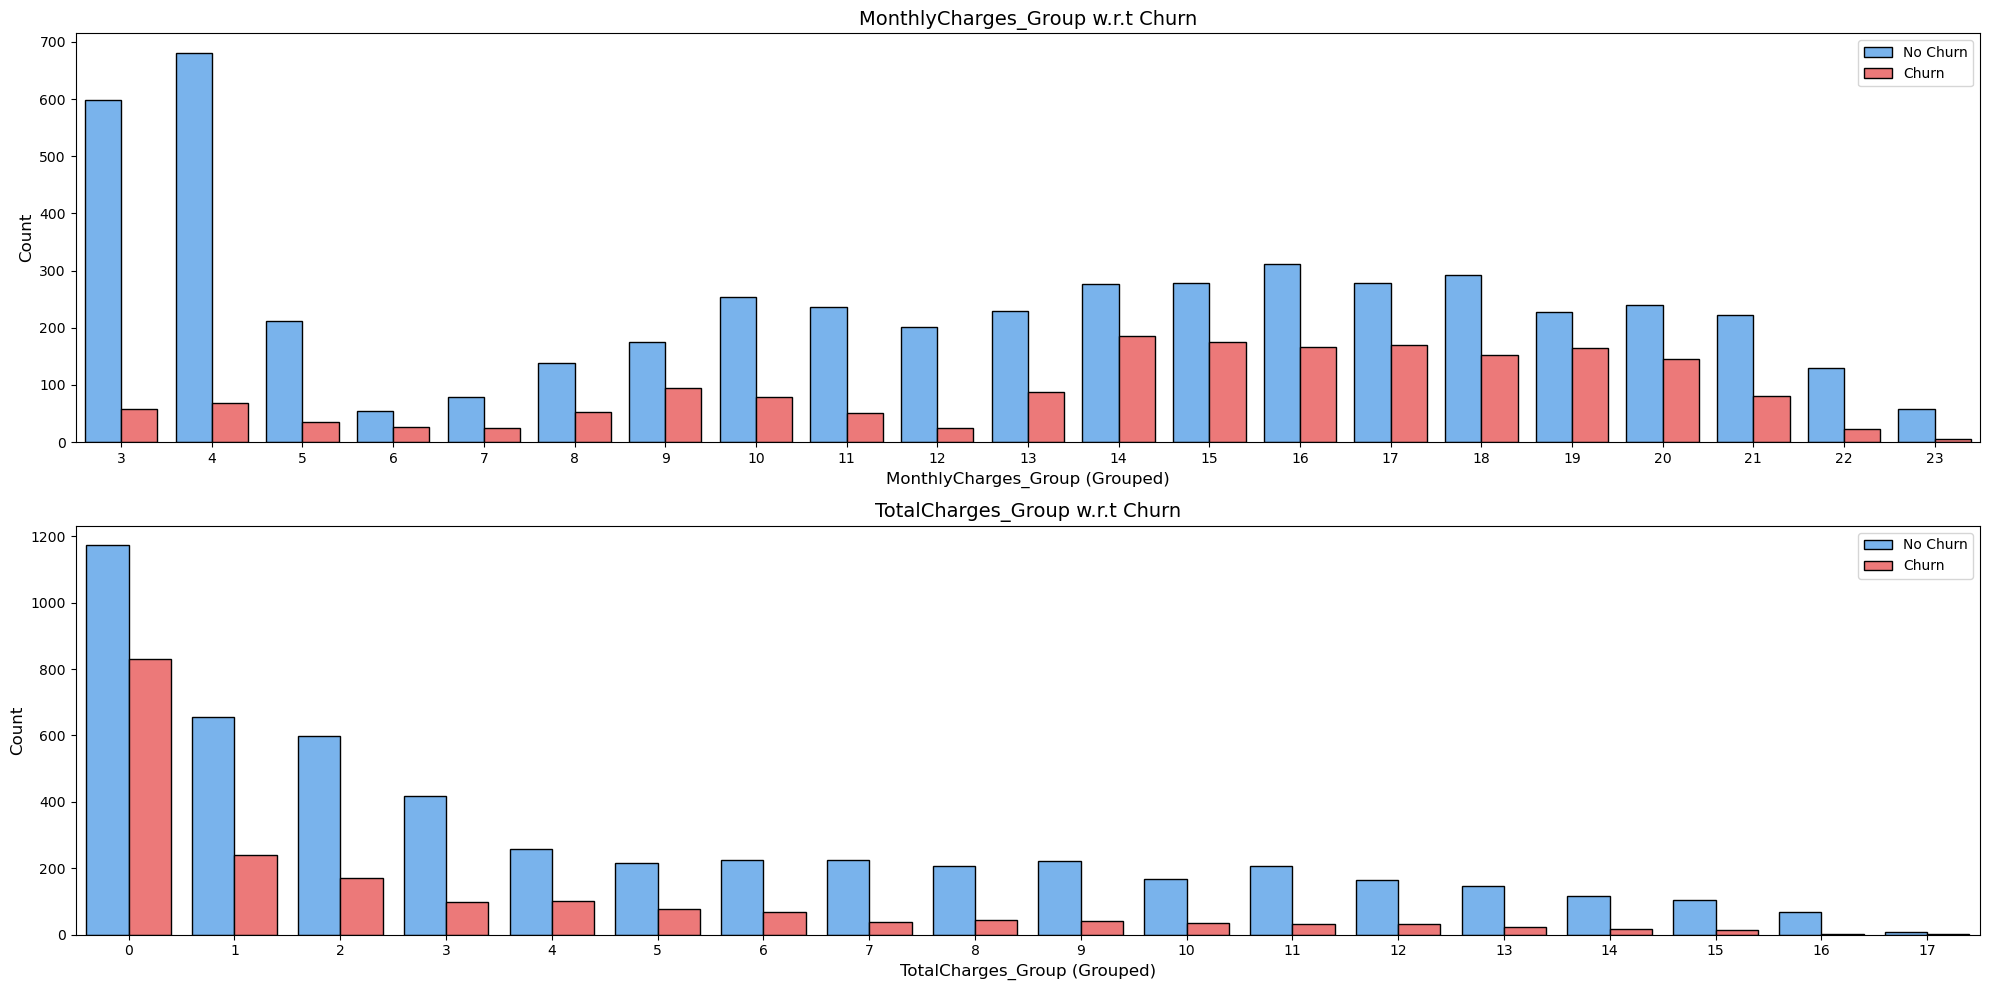

In [374]:
# Grouping Monthly Charges and Total Charges into categories
df1['MonthlyCharges_Group'] = pd.cut(df1['Monthly Charges'], bins=range(0, int(df1['Monthly Charges'].max()) + 5, 5), labels=False)
df1['TotalCharges_Group'] = pd.cut(df1['Total Charges'], bins=range(0, int(df1['Total Charges'].max()) + 500, 500), labels=False)

# Prepare the grouped numerical features for plotting
grouped_features = ['MonthlyCharges_Group', 'TotalCharges_Group']

# Create subplots for visualization
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))

for i, feature in enumerate(grouped_features):
    ax = axes[i]
    sns.countplot(x=feature, data=df1, hue='Churn Label', palette=colors, edgecolor='black', ax=ax)
    ax.set_title(f'{feature} w.r.t Churn', fontsize=14)
    ax.legend(['No Churn', 'Churn'], loc='upper right')
    ax.set_xlabel(f'{feature} (Grouped)', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


- For MonthlyCharges group, churn rate is high for the values between 65 (13x5) - 105 (21x5). This MonthlyCharges range of values caused the customers to switch.
- A very high number of customers opted out of the services for the TotalCharges below 500. This customer churning continues for a TotalCharges range of values from 0 (0x500) - 1000 (2x500).

#### Numerical features vs Categorical features w.r.t Target variable (Churn) :

### tenure vs Group 1 : Customer Information : gender | SeniorCitizen | Partner | Dependents |

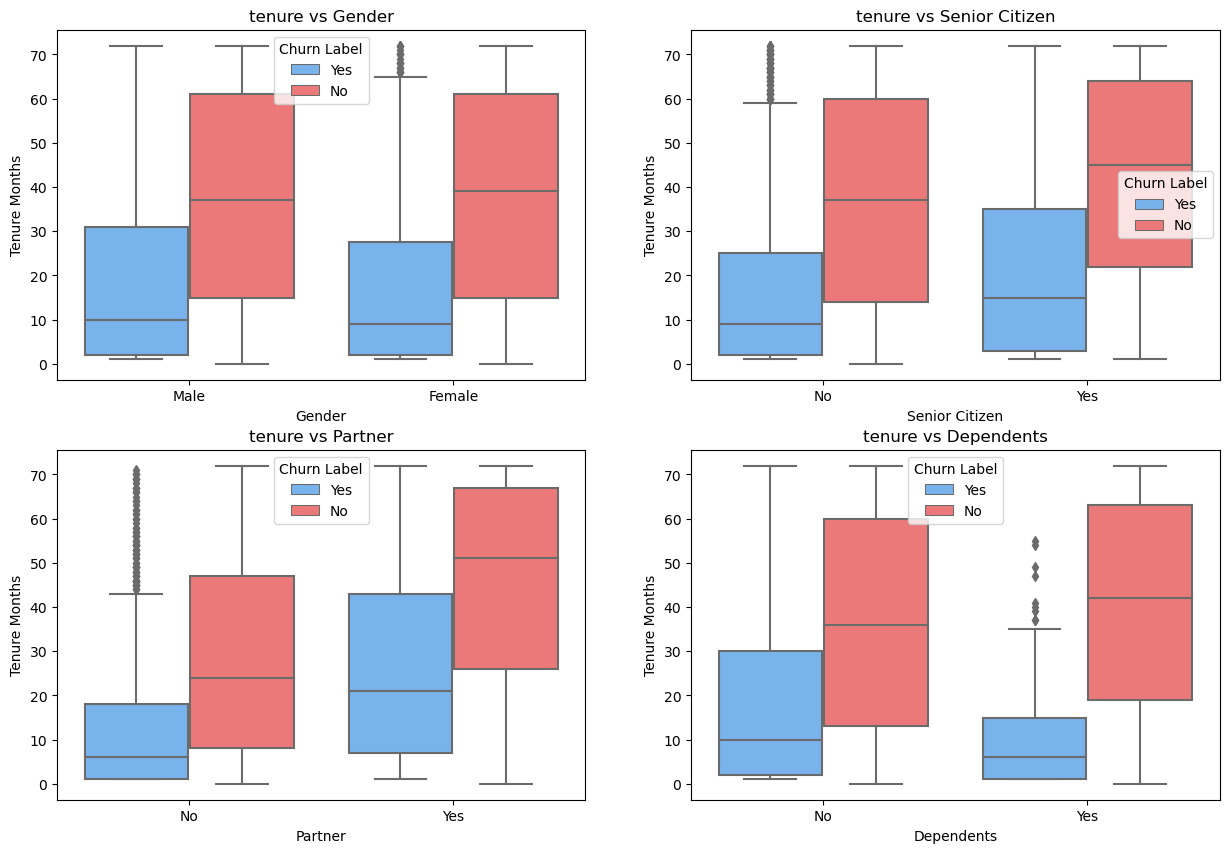

In [375]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(x = l1[i],y = 'Tenure Months',data = data,hue = 'Churn Label',palette = colors);
    plt.title('tenure vs ' + l1[i]);

**Churn Analysis by Demographics**

* **Gender:** The churn patterns for male and female customers are quite similar, indicating that gender may not be a significant factor influencing churn decisions.
* **Senior Citizen:** Senior citizens tend to churn within the first 35 months of their subscription. A significant portion of churn occurs between 20 and 35 months, suggesting a decision-making period where they may reevaluate their service needs.
* **Partner:** Customers with partners tend to stay with the service for longer periods, with a significant portion remaining active for 5 to 45 months.

tenure vs Group 2: **Services Subscribed by the Customer :** `PhoneService` | `MultipleLines` | `InternetService` | `Streaming TV` | `Streaming Movies` |

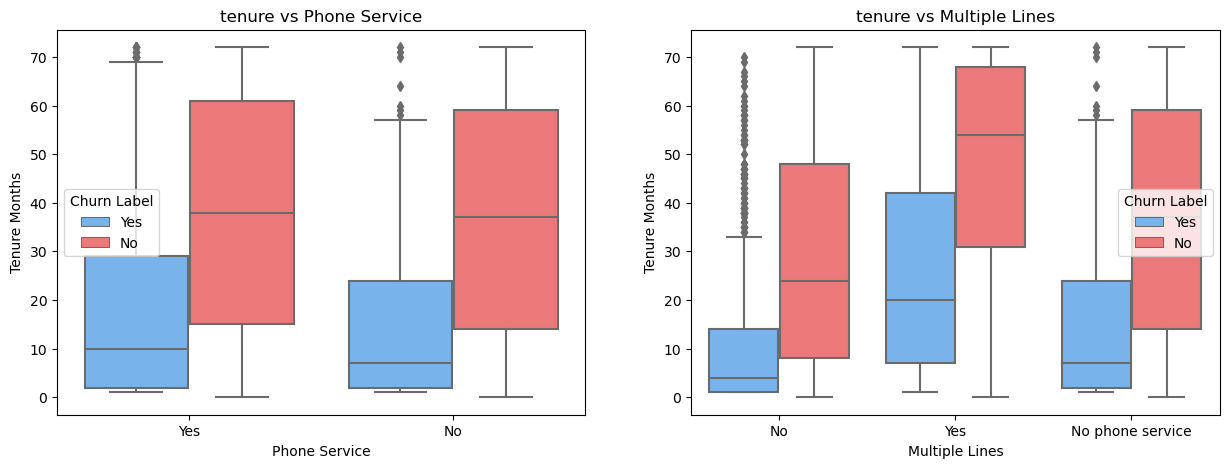

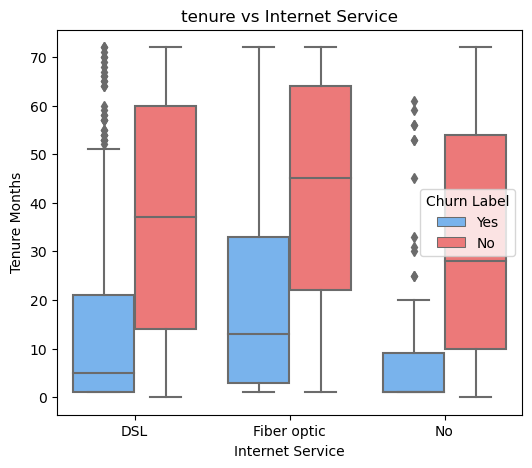

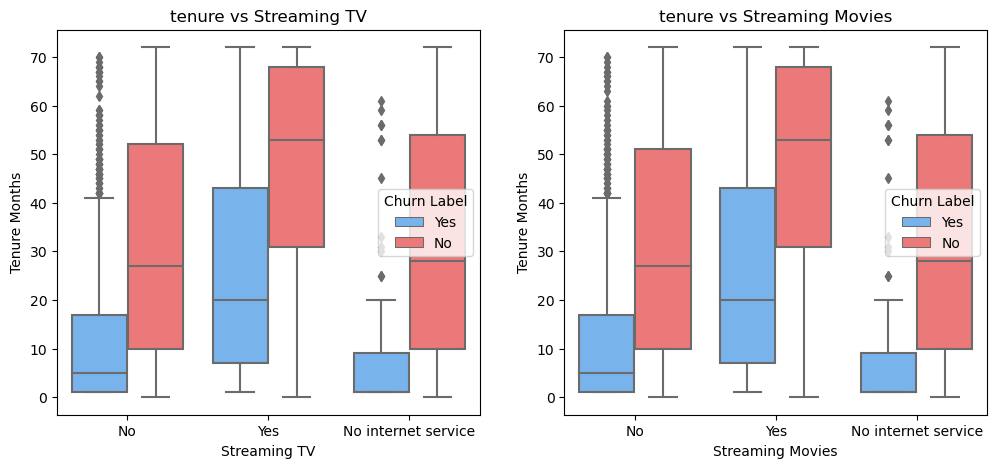

In [376]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))

for i in range(len(l2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i],y = 'Tenure Months',data = data,hue = 'Churn Label',palette = colors);
    plt.title('tenure vs ' + l2[i]);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.boxplot(x = l2[2],y = 'Tenure Months',data = data,hue = 'Churn Label',palette = colors);
plt.title('tenure vs ' + l2[2]);
    
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i + 3],y = 'Tenure Months',data = data,hue = 'Churn Label',palette = colors);
    plt.title('tenure vs ' + l2[i + 3]);

**Service Usage and Churn**

* **Multiple Lines:** The presence of multiple lines seems to correlate with higher monthly charges, regardless of churn status. 
* **Phone Service:** The churn patterns for customers with and without phone service are quite similar, suggesting that phone service may not be a significant driver of churn. 
* **Internet Service:** Customers were hesitant to adopt fiber optic internet, with a significant number churning within the first 30-35 months. This could be due to factors such as cost, availability, or perceived quality.
* **Streaming Services:** For both Streaming TV and Streaming Movies, there was a notable churn period between 10 and 40 months. This suggests that customers may initially subscribe to these services but may cancel them later if they find them unnecessary or not cost-effective.

tenure vs Group 2: **Services Subscribed by the Customer :** `Online Security` | `Online Backup` | `Device Protection` | `TechSupport` |

In [ ]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.boxplot(x = l2[i - 4],y = 'Tenure Months',data = data,hue = 'Churn Label',palette = colors);
    plt.title('tenure vs ' + l2[i-4]);

**Additional Services and Churn**

For additional services like Online Security, Online Backup, Device Protection, and Tech Support, customers tend to make a decision about whether to continue or switch within the first 30-35 months of their subscription. 
The median churn tenure for these services is around 25 months, indicating that many customers may cancel these services after a certain period of usage.

tenure vs Group 3 : `Contract` | `Paperless Billing` | `PaymentMethod` |

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
for i in range(len(l3)):
    plt.subplot(1,3,i + 1)
    ax = sns.boxplot(x = l3[i],y = 'Tenure Months',data = data,hue = 'Churn Label',palette = colors);
    plt.title('tenure vs ' + l3[i]);

**Contract, Billing, and Payment**

* **Contract:** Customers with one-year contracts tend to stay for about 25 months, while those with two-year contracts stay for around 45 months. However, both groups start considering switching after 35 and 55 months, respectively.
* **Paperless Billing:** Regardless of billing preference, customers seem to be equally likely to churn, indicating that paperless billing may not have a significant impact on retention.
* **Payment Method:** Customers who pay via automatic bank transfer or credit card tend to stay longer (around 20 months) compared to those who use electronic checks or mailed checks (around 10 and 5 months, respectively).

### MonthlyCharges vs Categorical Features :

MonthlyCharges vs Group 1 : Customer Information : gender | SeniorCitizen | Partner | Dependents |

In [ ]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(x = l1[i],y = 'Monthly Charges',data = data,hue = 'Churn Label',palette = colors); 
    plt.title('MonthlyCharges vs ' + l1[i]);

**Median Monthly Charges by Demographic Factors**

* **Gender:** Both male and female customers have a median monthly charge of around 60.
* **Senior Citizen:** Senior citizens tend to have higher monthly charges, with a median value around 80.
* **Partner:** Customers with partners have a slightly higher lower limit for churn, indicating that they may be willing to pay more for services.

MonthlyCharges vs Group 2: Services Subscribed by the Customer : PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies |¶

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))

for i in range(len(l2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i],y = 'Monthly Charges',data = data,hue = 'Churn Label',palette = colors);
    plt.title('MonthlyCharges vs ' + l2[i]);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.boxplot(x = l2[2],y = 'Monthly Charges',data = data,hue = 'Churn Label',palette = colors);
plt.title('MonthlyCharges vs ' + l2[2]);
    
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i + 3],y = 'Monthly Charges',data = data,hue = 'Churn Label',palette = colors);
    plt.title('MonthlyCharges vs ' + l2[i + 3]);

**Service Usage and Monthly Charges**

* **Internet Service:** Fiber optic internet has a significantly higher median monthly charge, which may contribute to its higher churn rate.
* **Streaming Services:** Both Streaming TV and Streaming Movies have relatively high monthly charges, which could be a factor in customer churn.
* **Phone Service:** While the range of monthly charges for phone service is wide (25-85), customers tend to churn when charges exceed 75.

MonthlyCharges vs Group 2: Services Subscribed by the Customer : OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport |

In [ ]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.boxplot(x = l2[i - 4],y = 'Monthly Charges',data = data,hue = 'Churn Label',palette = colors);
    plt.title('MonthlyCharges vs ' + l2[i-4]);

**Additional Services and Monthly Charges**

For additional services like Online Security, Online Backup, Device Protection, and Tech Support, the range of monthly charges is relatively narrow, ranging from 50 to 100. Customers who subscribe to these services tend to have similar monthly charges, regardless of whether they churn or not. This suggests that pricing may not be a major factor influencing churn for these specific services.

MonthlyCharges vs Group 3 : Contract | PaperlessBilling | PaymentMethod |

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

for i in range(len(l3)):
    plt.subplot(1,3,i + 1)
    ax = sns.boxplot(x = l3[i],y = 'Monthly Charges',data = data,hue = 'Churn Label',palette = colors);
    title = 'MonthlyCharges vs ' + l3[i]
    plt.title(title);

**Contract, Billing, and Payment**

* **Contract:** Month-to-month contracts have a slightly higher lower limit for monthly charges compared to one-year and two-year contracts. However, customers on month-to-month contracts tend to churn at lower monthly charge levels, indicating that price sensitivity may be a factor.
* **Payment Method:** Electronic checks have a relatively high lower limit for monthly charges, which may contribute to customer dissatisfaction and churn. Mailed checks, on the other hand, have a lower lower limit for both churned and retained customers.

### TotalCharges vs Categorical Features :

TotalCharges vs Group 1 : Customer Information : gender | SeniorCitizen | Partner | Dependents |

In [ ]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(x = l1[i],y = 'Total Charges',data = data,hue = 'Churn Label',palette = colors);
    plt.title('TotalCharges vs ' + l1[i]);

- TotalCharges for male & female customers is quite the same! SeniorCitizen that continued with the services have a higher starting and closing values of TotalCharges.
- Customers housing with their Partner have a higher median value of TotalCharges as compared to those living alone!

TotalCharges vs Group 2: Services Subscribed by the Customer : PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies |

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))

for i in range(len(l2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i],y = 'Total Charges',data = data,hue = 'Churn Label',palette = colors);
    plt.title('TotalCharges vs ' + l2[i]);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.boxplot(x = l2[2],y = 'Total Charges',data = data,hue = 'Churn Label',palette = colors);
plt.title('TotalCharges vs ' + l2[2]);
    
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i + 3],y = 'Total Charges',data = data,hue = 'Churn Label',palette = colors);
    plt.title('TotalCharges vs ' + l2[i + 3]);

**Total Charges and Churn**

* **Phone Service:** While total charges for phone service range from 0 to 4000, customers start considering switching when charges exceed 1000.
* **Multiple Lines:** Customers may start questioning the need for multiple lines when total charges reach around 2000. However, some customers are willing to pay significantly higher amounts (around 6000) for this service.
* **Internet Service:** Customers may initially experiment with fiber optic internet by paying around 2000. Those who continue with the service tend to have higher total charges, ranging from 3000 to 6000.
* **Streaming Services:** Similar to fiber optic internet, customers may initially test out streaming services with lower total charges. However, those who continue often have higher total charges.

TotalCharges vs Group 2: Services Subscribed by the Customer : OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport |¶

In [ ]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.boxplot(x = l2[i - 4],y = 'Total Charges',data = data,hue = 'Churn Label',palette = colors);
    plt.title('TotalCharges vs ' + l2[i-4]);

- For all the features mentioned above, customers become skeptical about paying for them around the 2000 mark. This median value of churn customers is very close to the lower limit of the customers that carry on with this service.
- Customers that do not churn out are ready to pay from 2000 - 6000 of TotalCharges.

TotalCharges vs Group 3 : Contract | PaperlessBilling | PaymentMethod |

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

for i in range(len(l3)):
    plt.subplot(1,3,i + 1)
    ax = sns.boxplot(x = l3[i],y = 'Total Charges',data = data,hue = 'Churn Label',palette = colors);
    plt.title('TotalCharges vs ' + l3[i]);

- Median values of customers that decide to opt out from the services that have One year & Two year contracts is high at around 4000 & 6000. Some of the customers with Two year contracts even paid around 7000.
- For PaymentMethod, customers are skeptical to pay using Electronic check for a shorter range of 0 - 2000 whereas for Bank transfer (automatic) & Credit Card (automatic) this range is around 0 - 4000.

### Numerical features vs Numerical features w.r.t Target variable (Churn) :

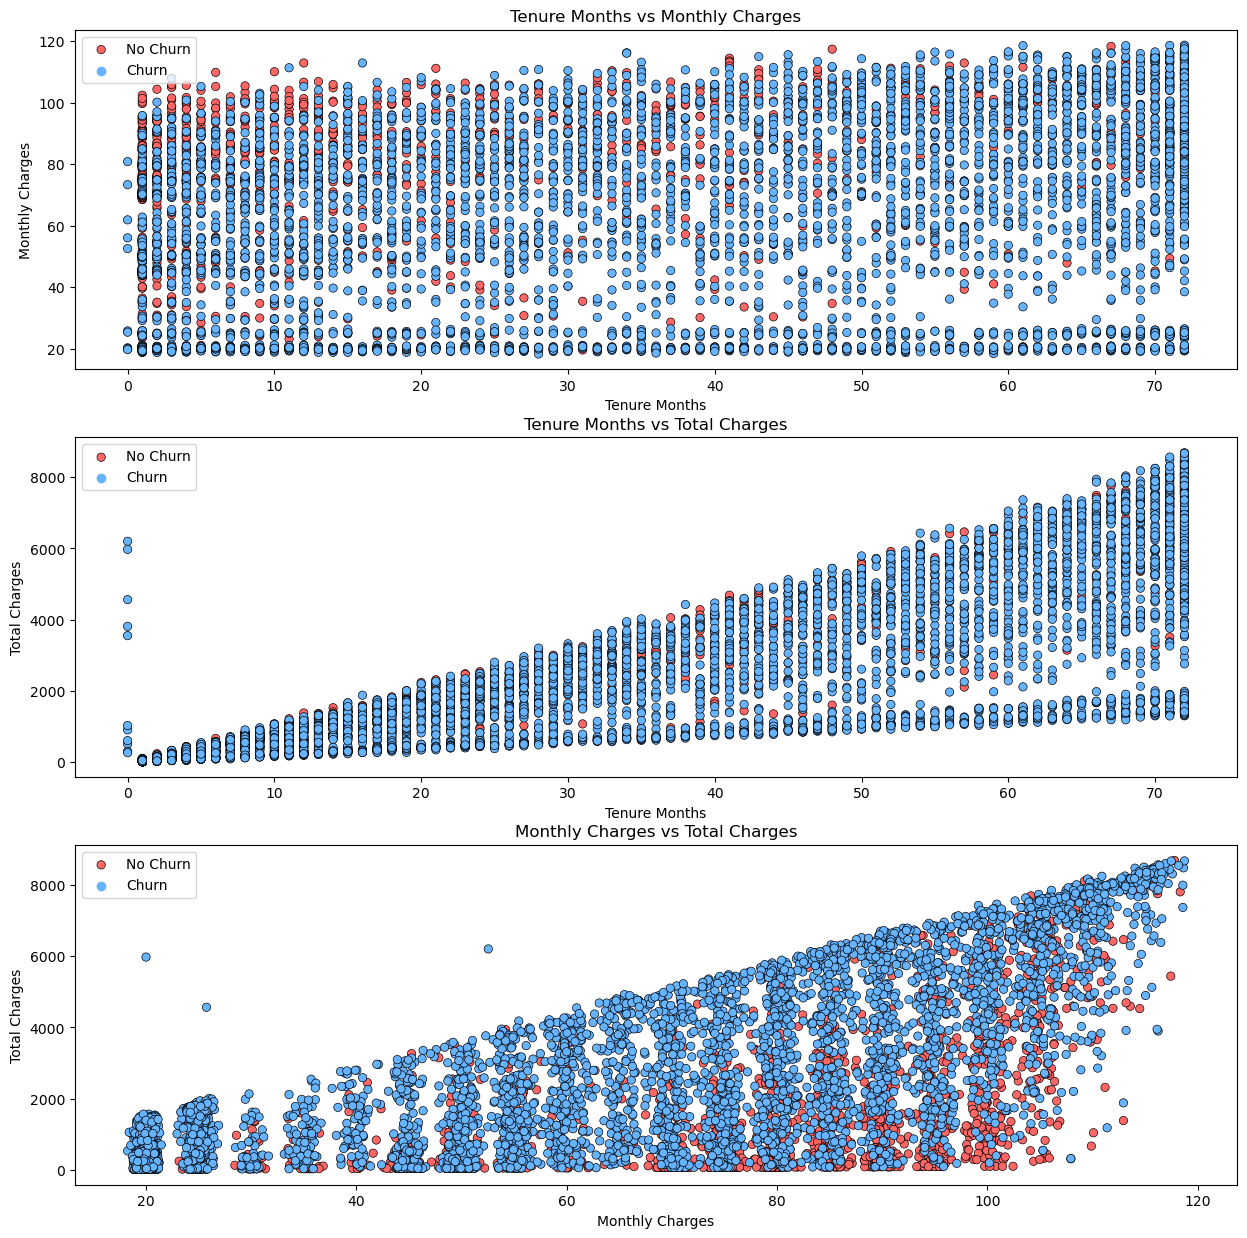

In [261]:
a = 0
fig,ax = plt.subplots(nrows = 3,ncols = 1,figsize = (15,15))
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(3,1,a)
            sns.scatterplot(x = numerical_features[i],y = numerical_features[j],data = df1,hue = 'Churn Label',palette = colors,edgecolor = 'black');
            plt.legend(['No Churn','Churn'],loc = 'upper left',)
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)

- For tenure of 0 - 20 months period, churning of customers quite at any MonthlyCharges values. For a tenure period from 20 - 60 months, customers at the top end of the MonthlyCharges values, 70 - 120, start to drop out from the services.
- For TotalCharges vs tenure, as tenure increases, TotalCharges increase as well! Customers opting out from their plans are the ones who are charged the highest of their tenure period alongwith a few customers whose Total Charges rank in the middle!
- Customers seemed to have decided to cancel their subscriptions when the MonthlyCharges reach 70 and above.

### Visualizing Churn Distribution Based on Geographic Locations
This map shows the regions where people are more likely to churn based on the `Latitude` and `Longitude` values from the dataset. Each point represents a customer, color-coded by their `Churn Label`.


In [266]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd

# Check if Latitude, Longitude, and Churn Label columns exist
if not {'Latitude', 'Longitude', 'Churn Label'}.issubset(data.columns):
    raise ValueError("Ensure the DataFrame contains 'Latitude', 'Longitude', and 'Churn Label' columns.")


# Calculate the map's center
latitude_center = data['Latitude'].mean()
longitude_center = data['Longitude'].mean()

# Create the map
churn_map = folium.Map(location=[latitude_center, longitude_center], zoom_start=10)

# Define marker colors based on churn
def get_churn_color(label):
    return 'red' if label == 1 else 'green'

# Add a marker cluster to the map
marker_cluster = MarkerCluster().add_to(churn_map)

# Add markers for each data point
for _, row in data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Churn Label: {row['Churn Label']}",
        icon=folium.Icon(color=get_churn_color(row['Churn Label']))
    ).add_to(marker_cluster)

# Save the map to an HTML file
churn_map.save('churn_map.html')

# Display map in Jupyter Notebook
from IPython.display import IFrame
IFrame('churn_map.html', width=800, height=600)


**Feature Importance and Churn Patterns**

Based on the EDA, the following factors seem to significantly influence customer churn:

**Categorical Features:**

* **Contract:** Month-to-month contracts are associated with higher churn rates. Longer-term contracts (one-year and two-year) tend to reduce churn.
* **Payment Method:** Electronic checks are associated with higher churn rates compared to other payment methods.
* **Internet Service:** Customers with fiber optic internet service may be more prone to churn, possibly due to higher costs or service-related issues.
* **Additional Services:** The absence of additional services like online security, online backup, device protection, and tech support can increase churn rates.

**Numerical Features:**

* **Tenure:** Shorter tenures are associated with higher churn rates. As tenure increases, customers tend to be more loyal.
* **Monthly Charges:** Higher monthly charges can lead to increased churn, especially when customers perceive the value to be low.
* **Total Charges:** Higher total charges may be a factor in churn, particularly when customers feel they are not getting adequate value for their money.

**Overall, a combination of factors, including contract type, payment method, service quality, pricing, and customer satisfaction, can influence churn decisions.** 

It's important to note that these are general trends observed in the data. Individual customer behavior may vary, and further analysis may be required to identify specific factors that contribute to churn in different customer segments.

## Feature Engineering

#### Data Scaling :

In [287]:
df1.columns

Index(['Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude',
       'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Reason'],
      dtype='object')

In [377]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1.drop(['Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', "Latitude", "Longitude", 'MonthlyCharges_Group','TotalCharges_Group', 'Churn Reason'], axis=1, inplace=True)

df1['Tenure Months'] = mms.fit_transform(df1[['Tenure Months']])
df1['Monthly Charges'] = mms.fit_transform(df1[['Monthly Charges']])
df1['Total Charges'] = mms.fit_transform(df1[['Total Charges']])
df1.head()

Gender  Senior Citizen  Partner  Dependents  Tenure Months  Phone Service  \
0       1               0        0           0           0.03              1   
1       0               0        0           1           0.03              1   
2       0               0        0           1           0.11              1   
3       0               0        1           1           0.39              1   
4       1               0        0           1           0.68              1   

   Multiple Lines  Internet Service  Online Security  Online Backup  \
0               0                 0                2              2   
1               0                 1                0              0   
2               2                 1                0              0   
3               2                 1                0              0   
4               2                 1                0              2   

   Device Protection  Tech Support  Streaming TV  Streaming Movies  Contract  \
0                  0             0             0                 0         0   
1                  0             0             0                 0         0   
2                  2             0             2                 2         0   
3                  2             2             2                 2         0   
4                  2             0             2                 2         0   

   Paperless Billing  Payment Method  Monthly Charges  Total Charges  \
0                  1               3             0.35           0.01   
1                  1               2             0.52           0.02   
2                  1               2             0.81           0.09   
3                  1               2             0.86           0.35   
4                  1               0             0.85           0.58   

   Churn Label  
0            1  
1            1  
2            1  
3            1  
4            1

**Data Scaling: Normalization and Standardization**

Machine learning models treat input features as numerical values without considering their underlying units or scales. To ensure that features with different scales contribute equally to the model's learning process, data scaling techniques are employed.

**Normalization**
Normalization scales features to a specific range, typically between 0 and 1. This is particularly useful for features with non-normal distributions. In our case, features like `tenure`, `MonthlyCharges`, and `TotalCharges` exhibit non-normal distributions, making normalization an appropriate choice.

**Standardization**
Standardization scales features to have a mean of 0 and a standard deviation of 1. It's suitable for features that are normally distributed or approximately normally distributed. While none of our features strictly follow a normal distribution, standardization could still be considered if there's a significant difference in the scale of features. However, in this specific case, normalization seems more appropriate.

By applying normalization to the specified features, we ensure that they are on a comparable scale, improving the model's ability to learn from the data and make accurate predictions.

#### Correlation Matrix :

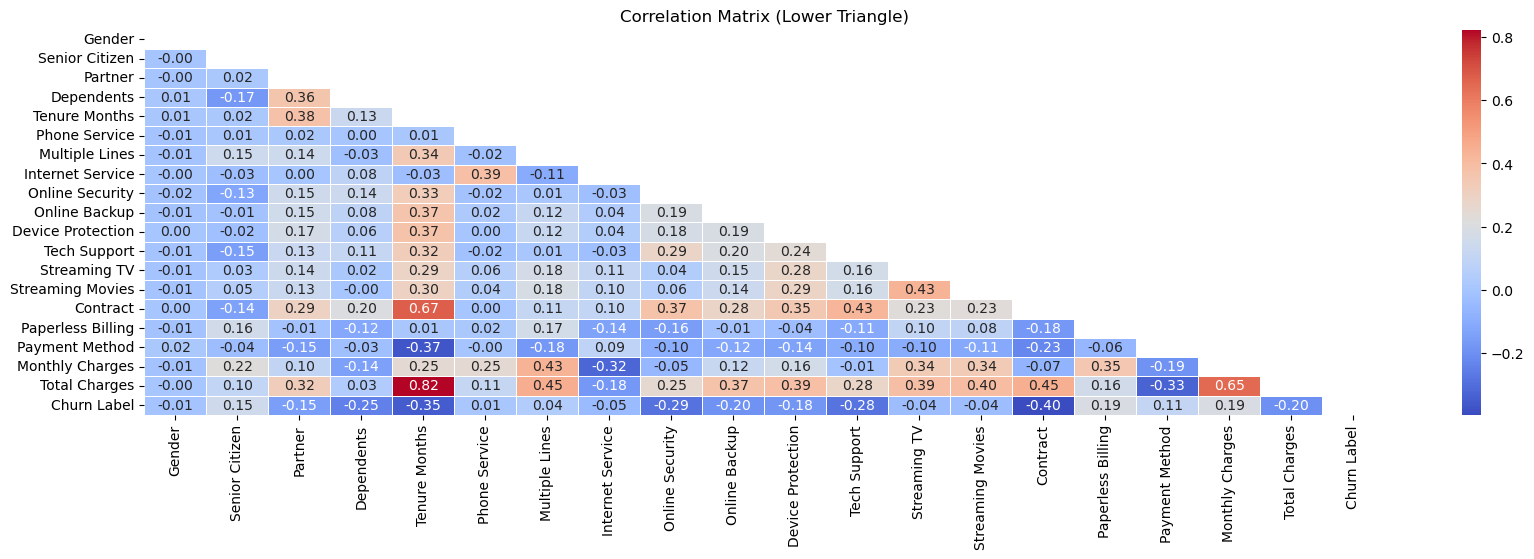

In [380]:
corr_matrix = df1.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(20, 5))

sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap='coolwarm', 
    annot=True,
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Matrix (Lower Triangle)")
plt.show()

- It is a huge matrix with too many features. We will check the correlation only with respect to Churn.

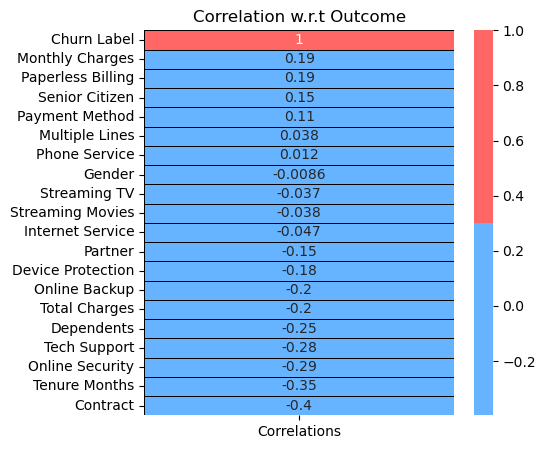

In [381]:
corr = df1.corrwith(df1['Churn Label']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Outcome');

- MulipleLines, PhoneService, gender, StreamingTV, StreamingMovies and InternetService does not display any kind of correlation. We drop the features with correlation coefficient between (-0.1,0.1).
- Remaining features either display a significant positive or negative correlation.

#### Feature Selection for Categorical Features :

In [382]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

#### Chi-Squared Test :

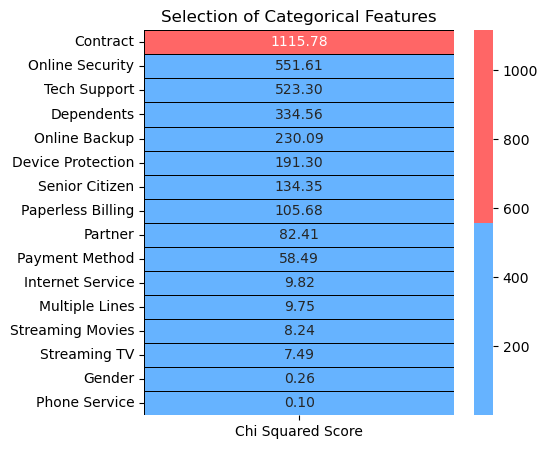

In [384]:
features = df1.loc[:,categorical_features]
target = df1.loc[:,'Churn Label']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

- PhoneService, gender, StreamingTV, StreamingMovies, MultipleLines and InternetService display a very low relation with Churn.

#### Feature Selection for Numerical Features :

In [386]:
from sklearn.feature_selection import f_classif

#### ANOVA Test :

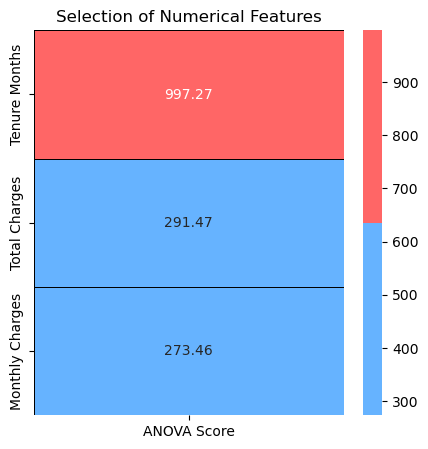

In [387]:
features = df1.loc[:,numerical_features]
target = df1.loc[:,'Churn Label']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

- According to the ANOVA test, higher the value of the ANOVA score, higher the importance of the feature.
- From the above results, we need to include all the numerical features for modeling.

In [388]:
df1.drop(columns = ['Phone Service', 'Gender','Streaming TV','Streaming Movies','Multiple Lines','Internet Service'],inplace = True)
df1.head()

Senior Citizen  Partner  Dependents  Tenure Months  Online Security  \
0               0        0           0           0.03                2   
1               0        0           1           0.03                0   
2               0        0           1           0.11                0   
3               0        1           1           0.39                0   
4               0        0           1           0.68                0   

   Online Backup  Device Protection  Tech Support  Contract  \
0              2                  0             0         0   
1              0                  0             0         0   
2              0                  2             0         0   
3              0                  2             2         0   
4              2                  2             0         0   

   Paperless Billing  Payment Method  Monthly Charges  Total Charges  \
0                  1               3             0.35           0.01   
1                  1               2             0.52           0.02   
2                  1               2             0.81           0.09   
3                  1               2             0.86           0.35   
4                  1               0             0.85           0.58   

   Churn Label  
0            1  
1            1  
2            1  
3            1  
4            1

#### We will now move onto data balancing!

#### Data Balancing using SMOTE :

**Addressing Data Imbalance: Oversampling**

To mitigate the impact of class imbalance, we'll employ an oversampling technique. This involves increasing the number of instances in the minority class (Churn) to match the majority class (Not-Churn).

We'll utilize the `imbalanced-learn` library to implement oversampling. This library provides various techniques, including:

* **Random OverSampling:** Randomly replicates minority class samples.
* **SMOTE (Synthetic Minority Over-sampling Technique):** Generates synthetic samples similar to the minority class.

After careful consideration and experimentation, we've determined that oversampling is the most suitable approach for our dataset.

In [389]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [390]:
over = SMOTE(sampling_strategy = 1)

f1 = df1.iloc[:,:13].values
t1 = df1.iloc[:,13].values

f1, t1 = over.fit_resample(f1, t1)
Counter(t1)

Counter({1: 5174, 0: 5174})

## Modelling

In [395]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [393]:
x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size = 0.20, random_state = 2)

- Selecting the features from the above conducted tests and splitting the data into 80 - 20 train - test groups.

In [396]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, classification_report


def model(classifier, x_train, y_train, x_test, y_test):
    # Fit the model
    classifier.fit(x_train, y_train)
    
    # Make predictions
    prediction = classifier.predict(x_test)
    prediction_proba = classifier.predict_proba(x_test)[:, 1]  # For ROC, use probabilities of the positive class
    
    # Cross Validation
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    cv_score = cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean()
    print("Cross Validation Score : ", '{0:.2%}'.format(cv_score))
    
    # ROC AUC Score
    roc_auc = roc_auc_score(y_test, prediction_proba)
    print("ROC AUC Score : ", '{0:.2%}'.format(roc_auc))
    
    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, prediction_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Chance')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

def model_evaluation(classifier, x_test, y_test):
    # Confusion Matrix
    cm = confusion_matrix(y_test, classifier.predict(x_test))
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, cmap='Blues', fmt='', cbar=False)
    plt.title('Confusion Matrix')
    plt.show()
    
    # Classification Report
    print(classification_report(y_test, classifier.predict(x_test)))


#### 1] Xgboost Classifier :

In [397]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

Cross Validation Score :  90.86%
ROC AUC Score :  90.36%


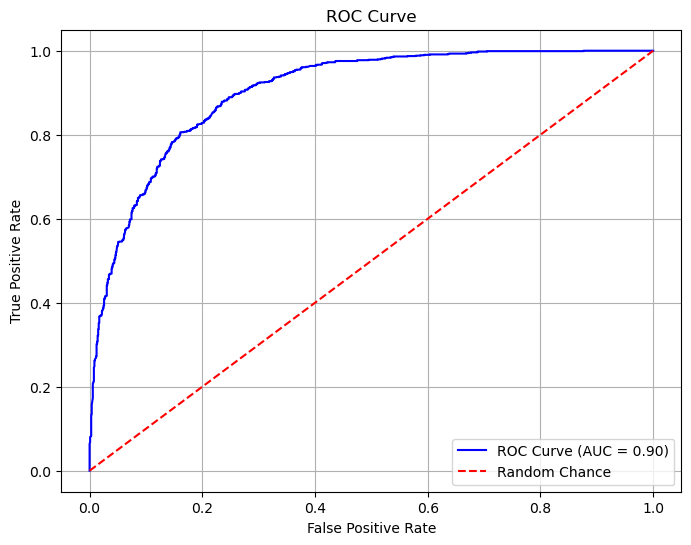

In [398]:
model(classifier_xgb,x_train,y_train,x_test,y_test)

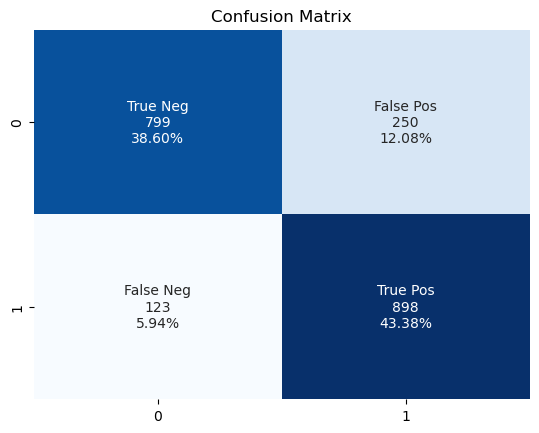

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1049
           1       0.78      0.88      0.83      1021

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



In [399]:
model_evaluation(classifier_xgb,x_test,y_test)

#### 2] LightGBM Classifier :

In [400]:
from lightgbm import LGBMClassifier

classifier_lgbm = LGBMClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

Cross Validation Score :  91.04%
ROC AUC Score :  90.62%


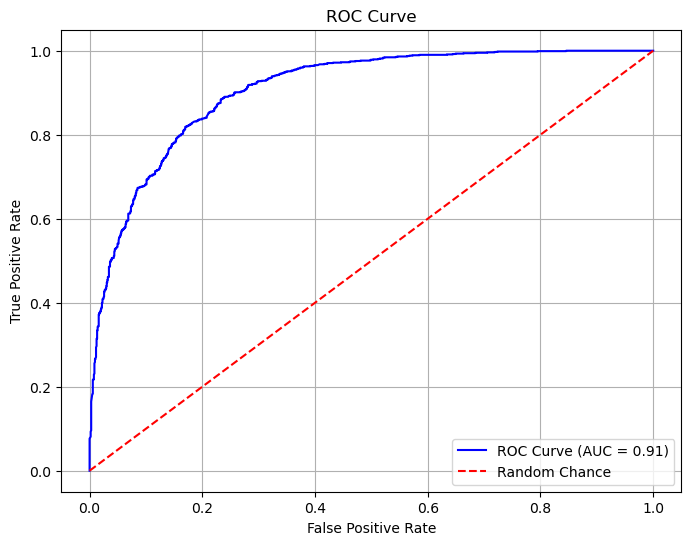

In [401]:
model(classifier_lgbm,x_train,y_train,x_test,y_test)

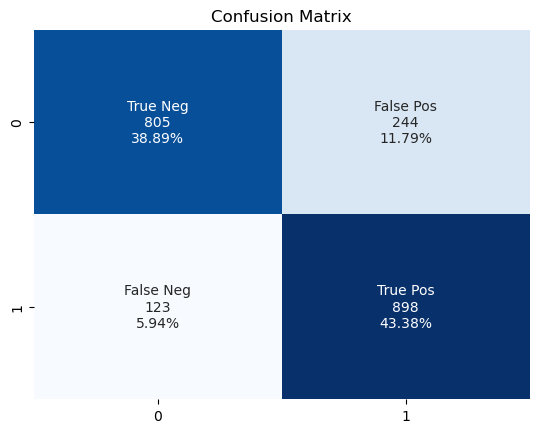

              precision    recall  f1-score   support

           0       0.87      0.77      0.81      1049
           1       0.79      0.88      0.83      1021

    accuracy                           0.82      2070
   macro avg       0.83      0.82      0.82      2070
weighted avg       0.83      0.82      0.82      2070



In [402]:
model_evaluation(classifier_lgbm,x_test,y_test)

#### 3] Random Forest Classifier :

In [403]:
from sklearn.ensemble import RandomForestClassifier

In [404]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

Cross Validation Score :  87.01%
ROC AUC Score :  85.98%


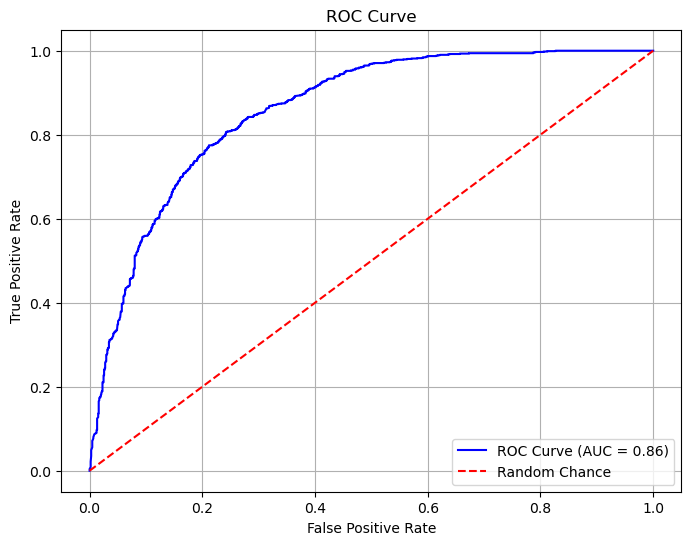

In [405]:
model(classifier_rf,x_train,y_train,x_test,y_test)

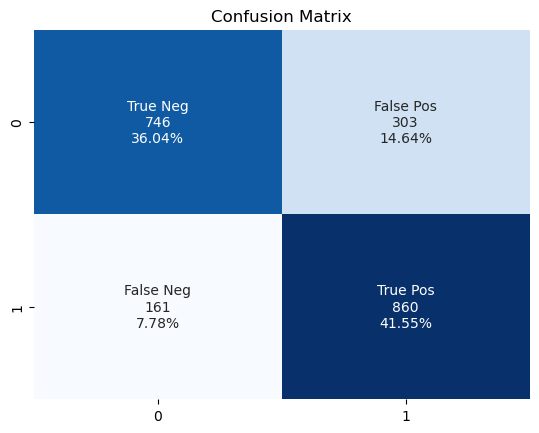

              precision    recall  f1-score   support

           0       0.82      0.71      0.76      1049
           1       0.74      0.84      0.79      1021

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.77      2070



In [406]:
model_evaluation(classifier_rf,x_test,y_test)

### 4] Decision Tree Classifier :

In [407]:
from sklearn.tree import DecisionTreeClassifier

In [408]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

Cross Validation Score :  85.28%
ROC AUC Score :  84.30%


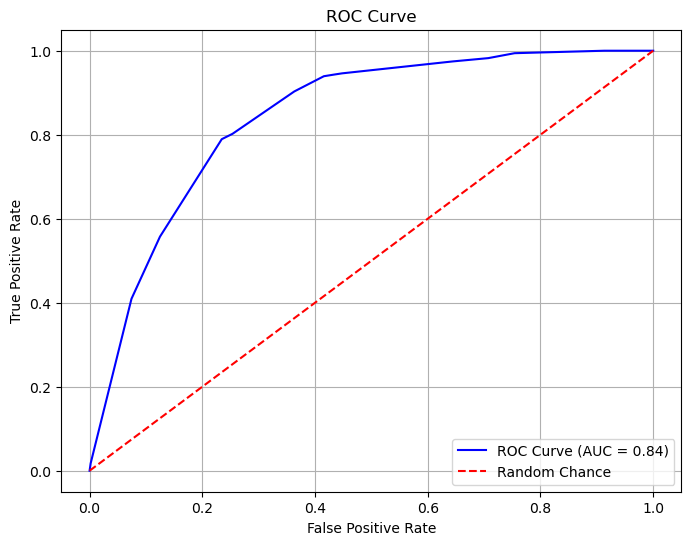

In [409]:
model(classifier_dt,x_train,y_train,x_test,y_test)

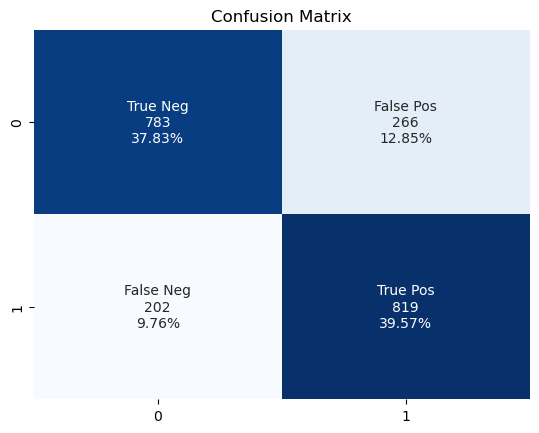

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1049
           1       0.75      0.80      0.78      1021

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.78      0.77      0.77      2070



In [410]:
model_evaluation(classifier_dt,x_test,y_test)

#### 5] Stack of XGBClassifier, LightGBMClassifier, Random Forest Classifer & Decision Tree Classifier :

In [411]:
from sklearn.ensemble import StackingClassifier

stack = StackingClassifier(estimators = [('classifier_xgb',classifier_xgb),
                                         ('classifier_lgbm',classifier_lgbm),
                                         ('classifier_rf',classifier_rf),
                                         ('classifier_dt',classifier_dt)],
                           final_estimator = classifier_lgbm)

**Stacking Classifiers**

To further enhance the predictive performance of our model, we'll employ a stacking technique. This involves combining multiple base models to create a more powerful ensemble model.

The selected base models for stacking are:

* **XGBClassifier:** A powerful gradient boosting algorithm known for its high accuracy and efficiency.
* **LightGBMClassifier:** Another gradient boosting algorithm that is faster and more scalable than XGBoost.
* **RandomForestClassifier:** An ensemble method that combines multiple decision trees to improve accuracy and reduce overfitting.
* **DecisionTreeClassifier:** A simple yet effective decision tree algorithm.

The final prediction is made by a meta-model, often referred to as the `final_estimator`. This meta-model is trained on the predictions of the base models as features. By leveraging the strengths of multiple models, stacking can often achieve better performance than individual models.

Cross Validation Score :  91.59%
ROC AUC Score :  91.36%


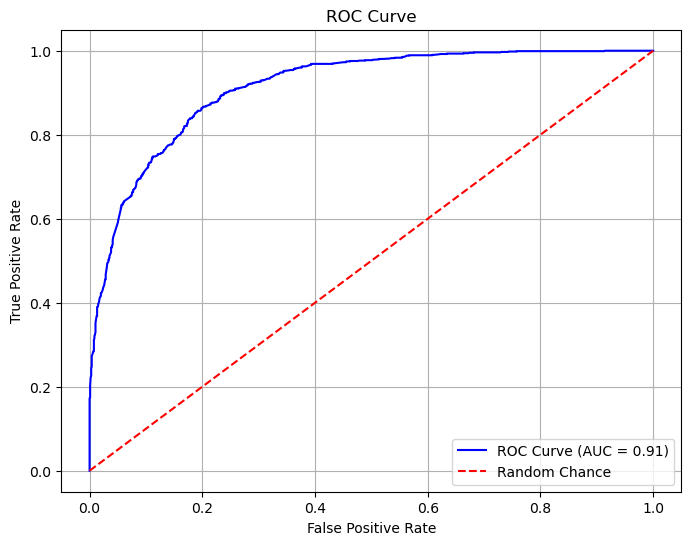

In [412]:
model(stack,x_train,y_train,x_test,y_test)

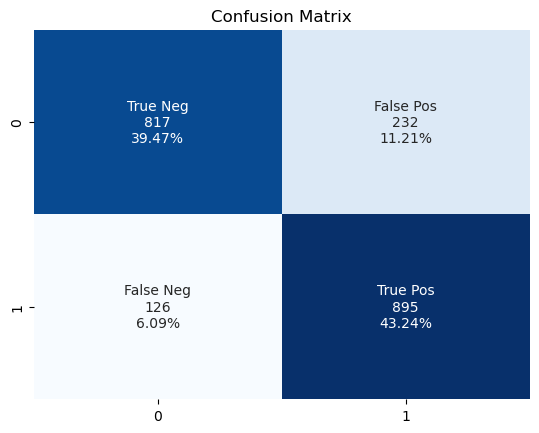

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1049
           1       0.79      0.88      0.83      1021

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



In [413]:
model_evaluation(stack,x_test,y_test)

## Measures for Reducing Customer Churn & Revenue Increase

**Key Insights and Recommendations:**

**Customer Segmentation and Personalized Marketing:**

* **Segment customers:** Group customers based on demographics, service usage, and churn risk to tailor marketing efforts.
* **Implement a loyalty program:** Reward loyal customers with incentives to foster long-term relationships.
* **Offer flexible contracts:** Provide flexible contract options to cater to diverse customer needs.

**Service Quality and Customer Support:**

* **Prioritize customer satisfaction:** Invest in robust customer support channels.
* **Implement proactive customer service:** Anticipate and address customer issues.
* **Monitor service quality:** Track key performance indicators to identify areas for improvement.

**Pricing and Bundling Strategies:**

* **Offer competitive pricing:** Conduct market research to optimize pricing strategies.
* **Explore bundling opportunities:** Combine services to increase customer value.
* **Consider tiered pricing:** Provide different pricing tiers to meet diverse customer needs.

**Data-Driven Decision Making:**

* **Leverage data analytics:** Utilize data to gain insights into customer behavior and preferences.
* **Implement a data governance framework:** Ensure data quality and security.
* **Utilize predictive analytics:** Forecast churn and proactively address customer needs.

**Continuous Improvement:**

* **Regularly review and refine strategies:** Stay updated on industry trends and customer expectations.
* **Conduct customer surveys and feedback analysis:** Gather insights to improve products and services.
* **Embrace innovation:** Explore new technologies to enhance customer experience.

By implementing these strategies, the Telco company can effectively address customer concerns, improve customer satisfaction, and reduce churn.